## Import Packages and Read Data

In [1]:
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('data/5guys_flight_data.csv', low_memory=False)
df.head()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME_x,DEST_AIRPORT_ID,...,WT08,WT09,WESD,WT10,PSUN,TSUN,SN32,SX32,TOBS,WT11
0,1,28,1,UA,N13718,830,13930,ORD,"Chicago, IL",14262,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,28,1,EV,N14902,4020,13930,ORD,"Chicago, IL",11193,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,28,1,UA,N56859,1942,13930,ORD,"Chicago, IL",11292,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,28,1,UA,N37253,2043,13930,ORD,"Chicago, IL",12266,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,28,1,UA,N57864,2005,13930,ORD,"Chicago, IL",11292,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploratory Data Analysis

### Lazy EDA

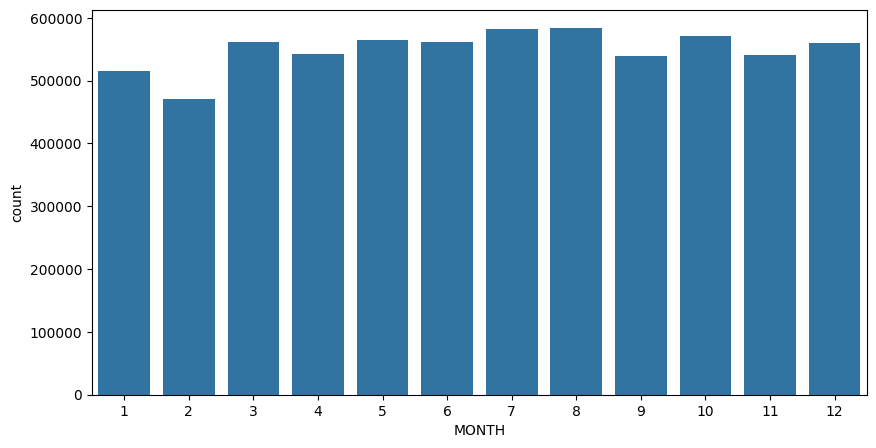

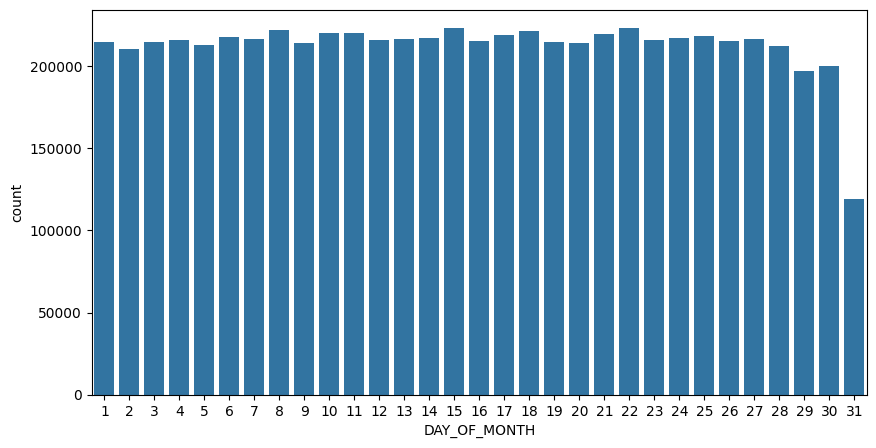

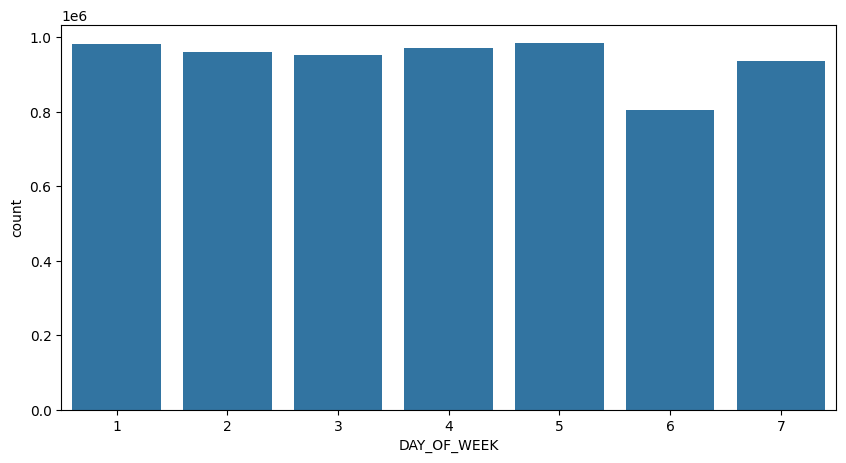

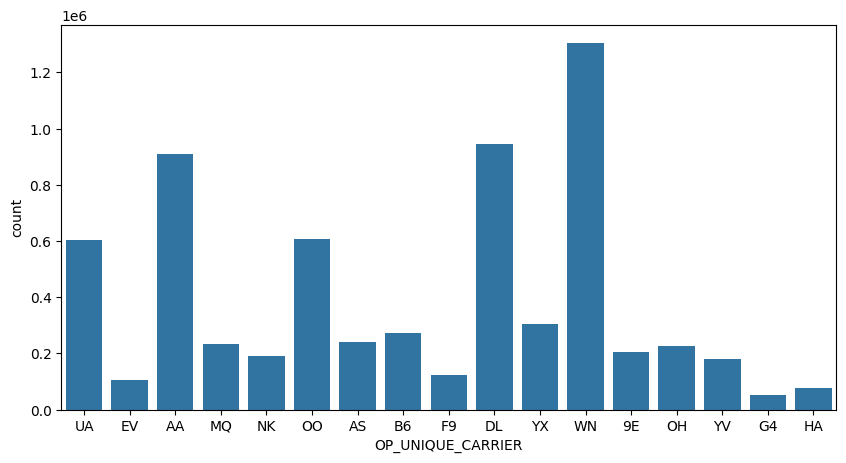

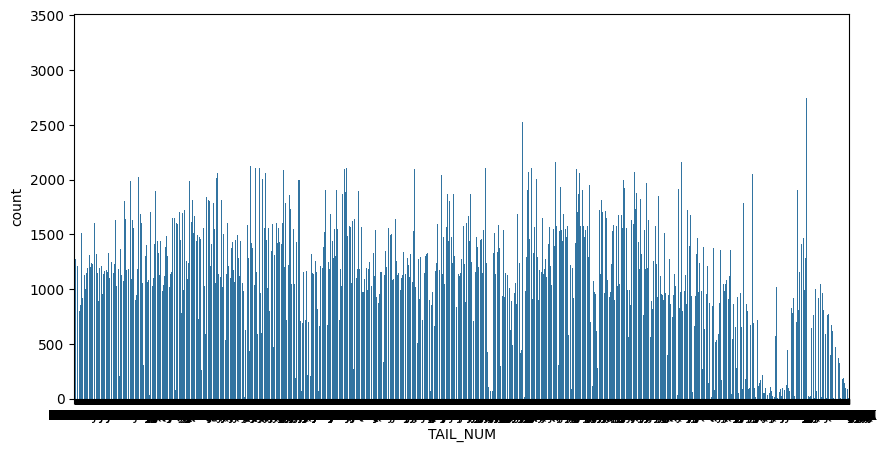

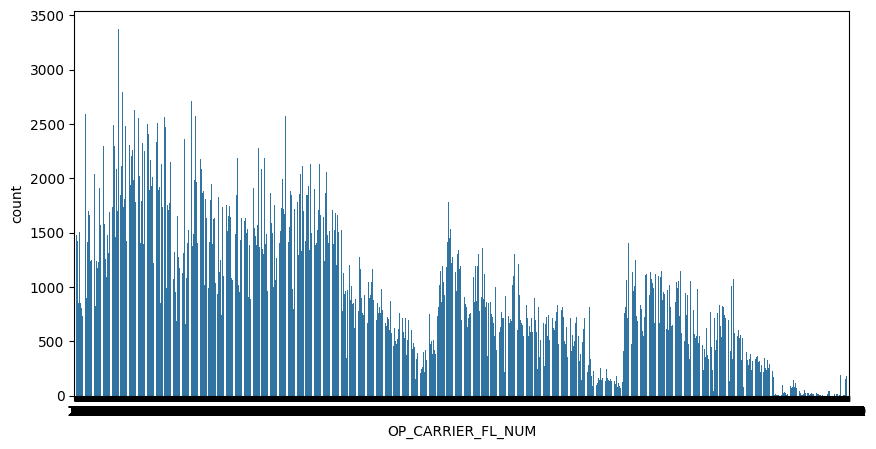

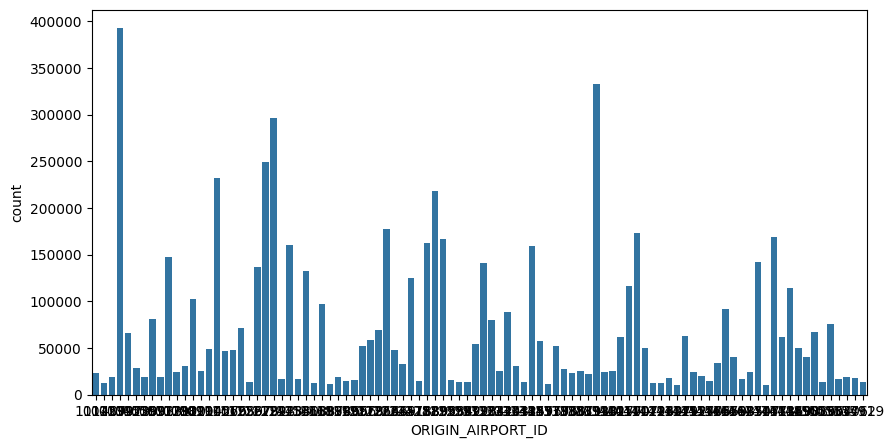

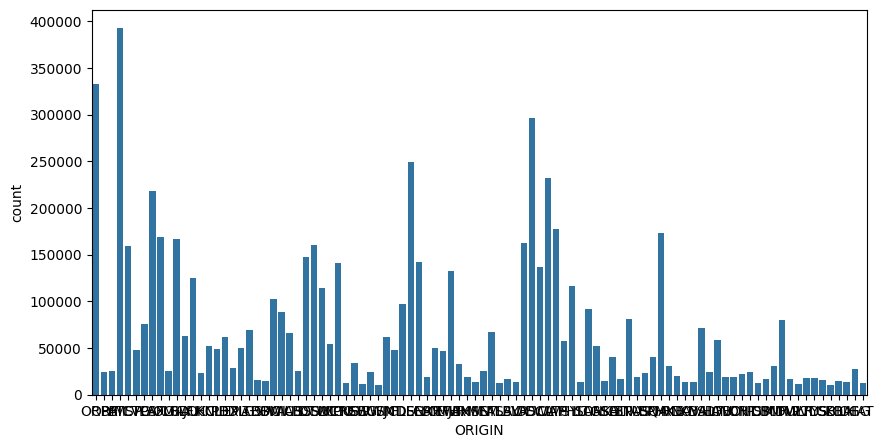

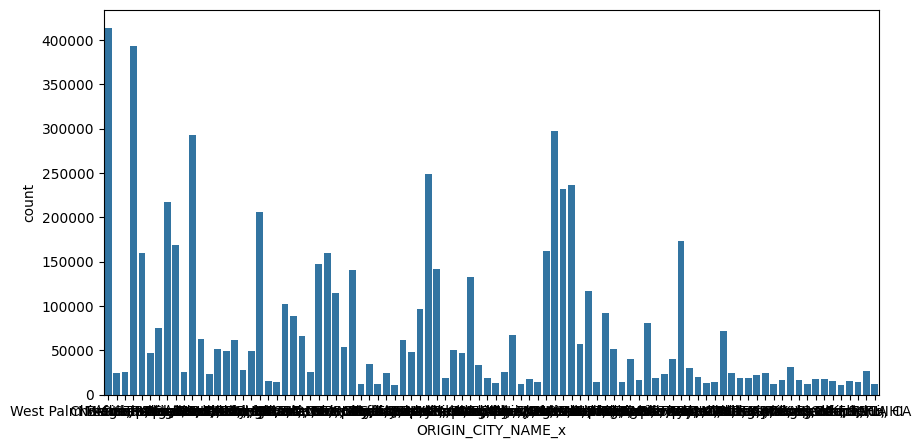

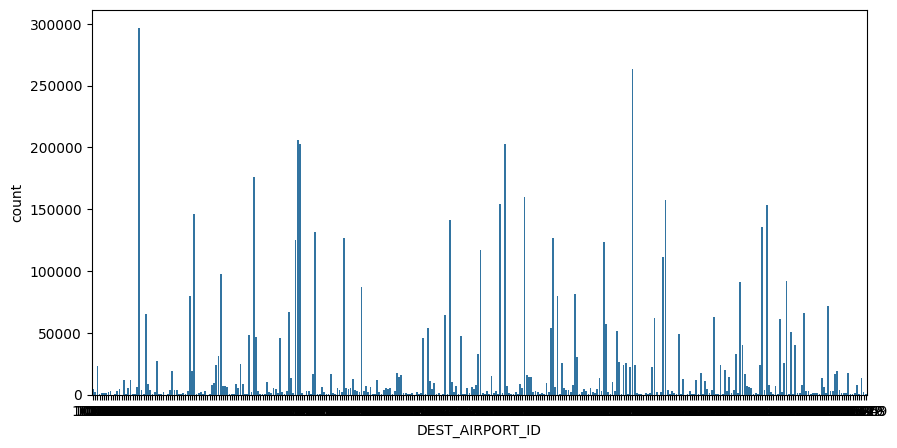

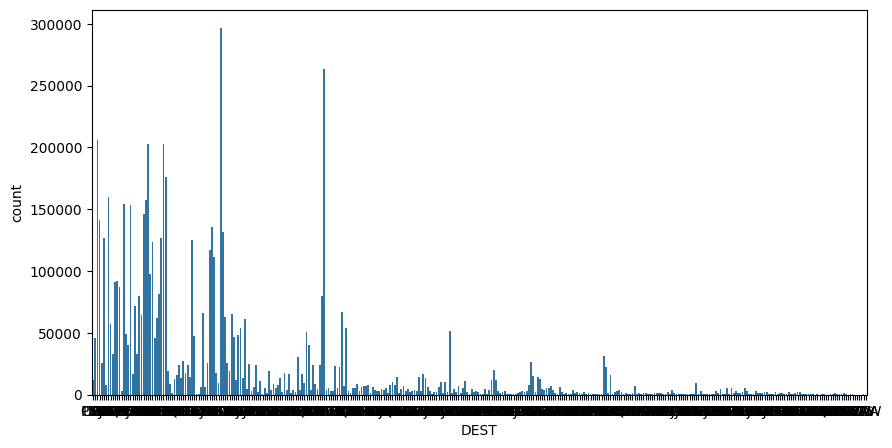

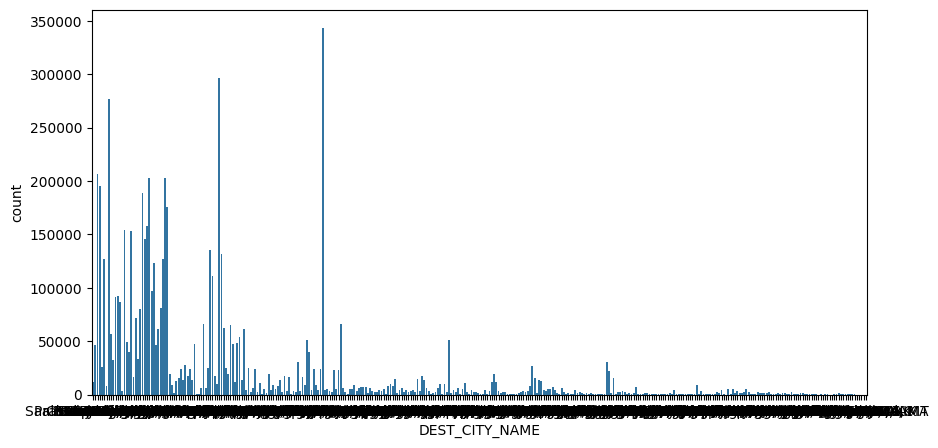

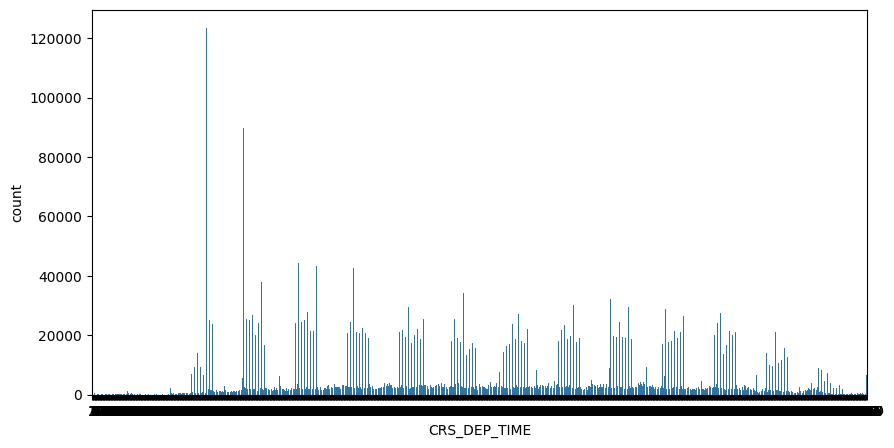

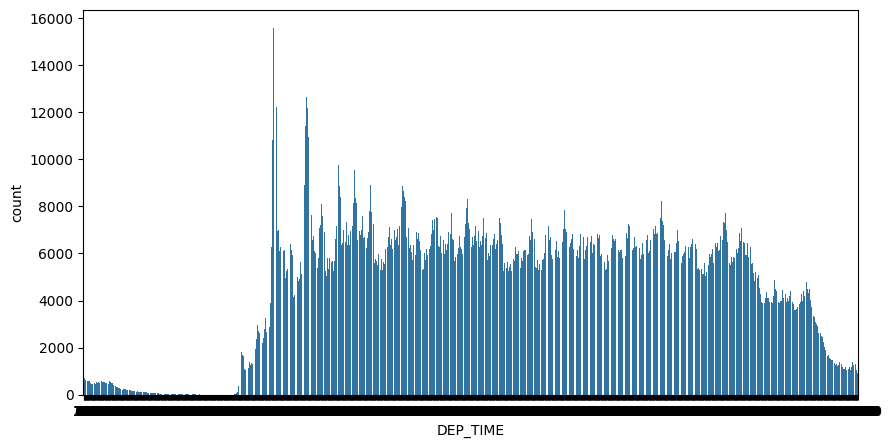

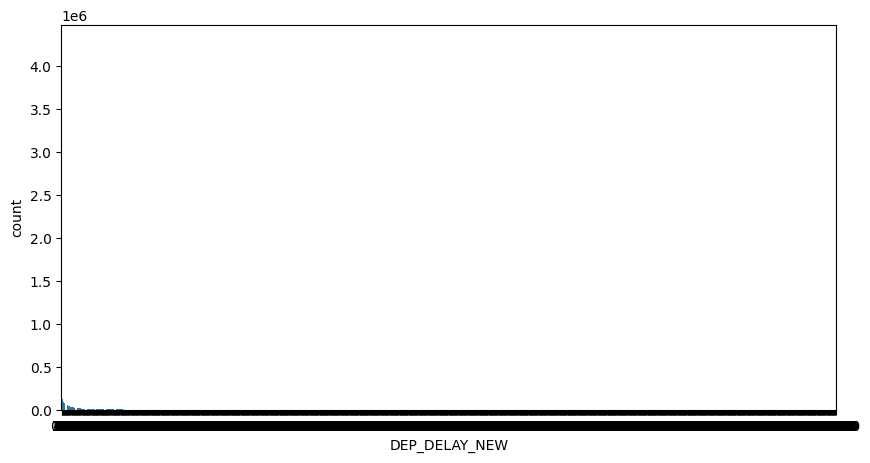

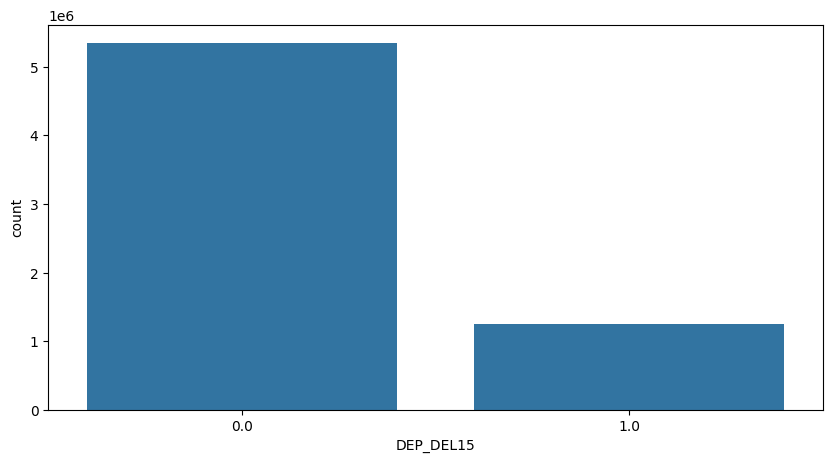

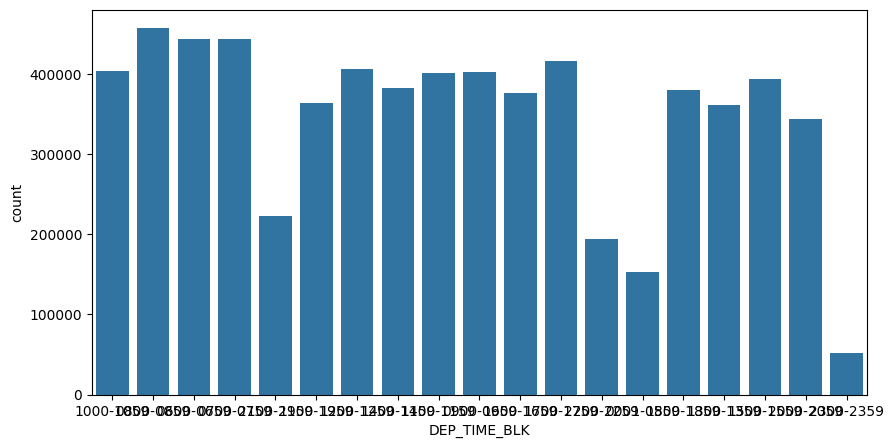

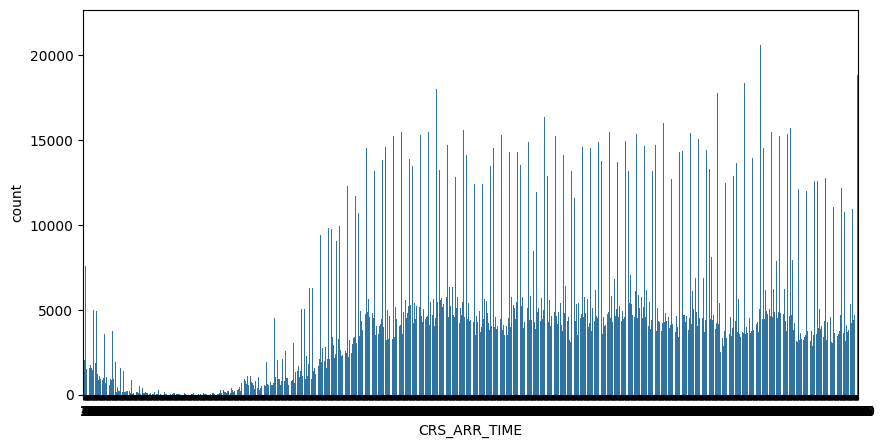

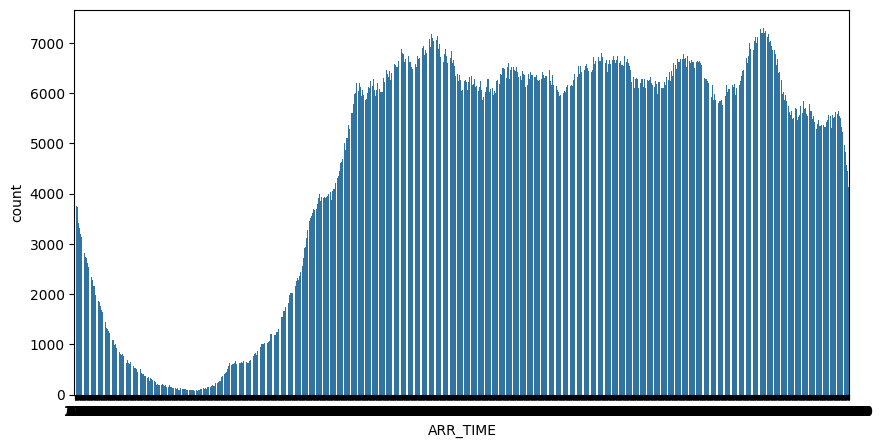

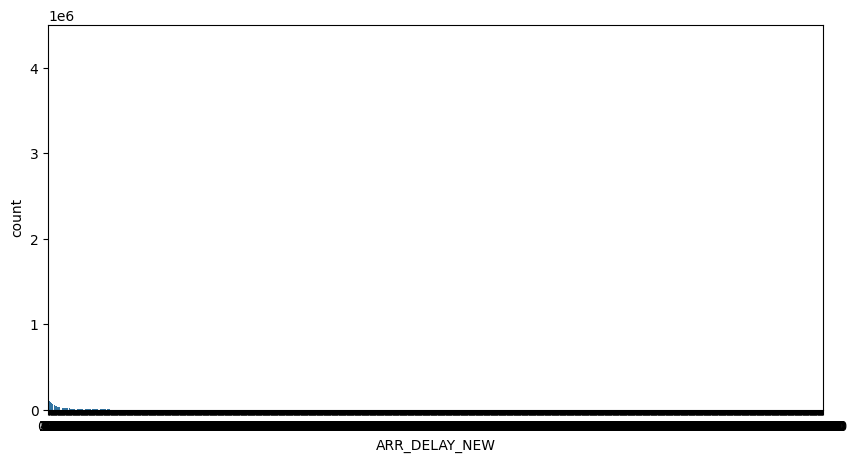

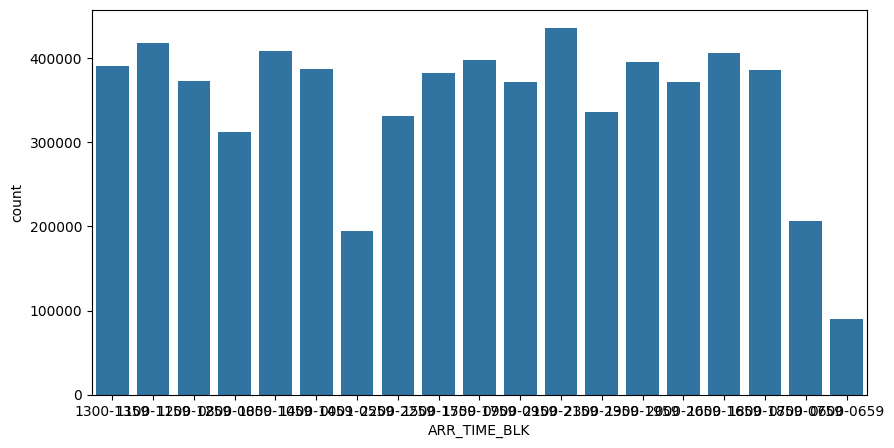

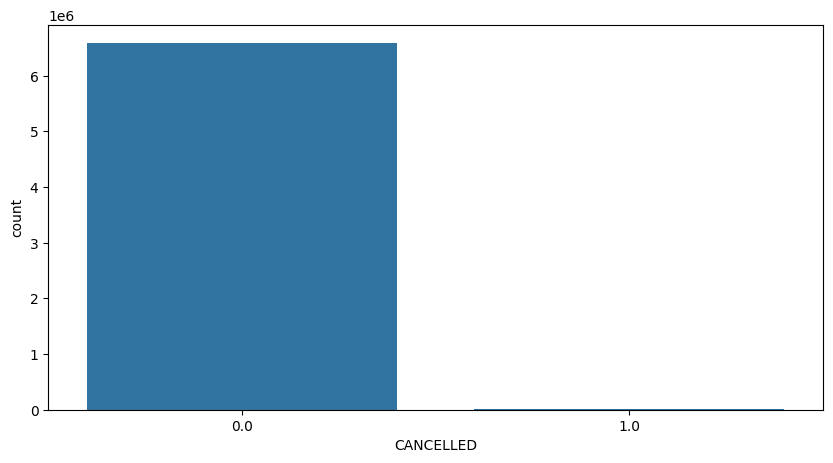

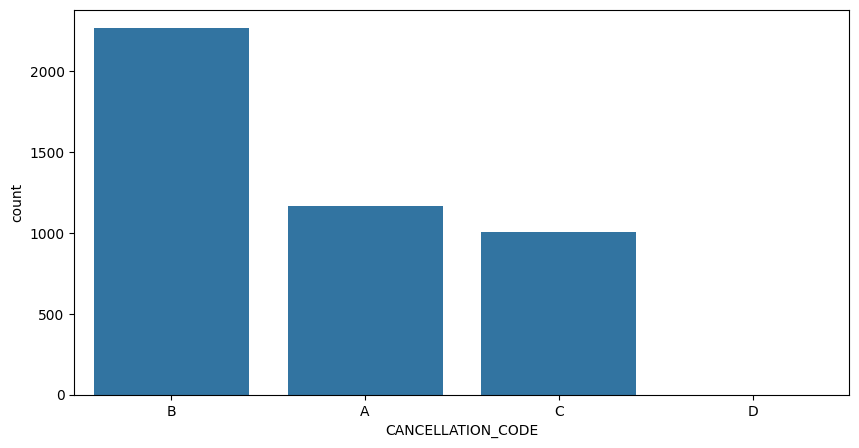

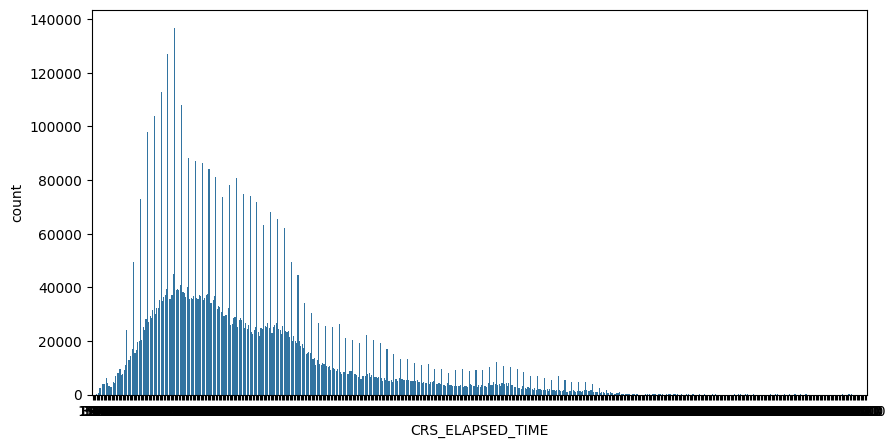

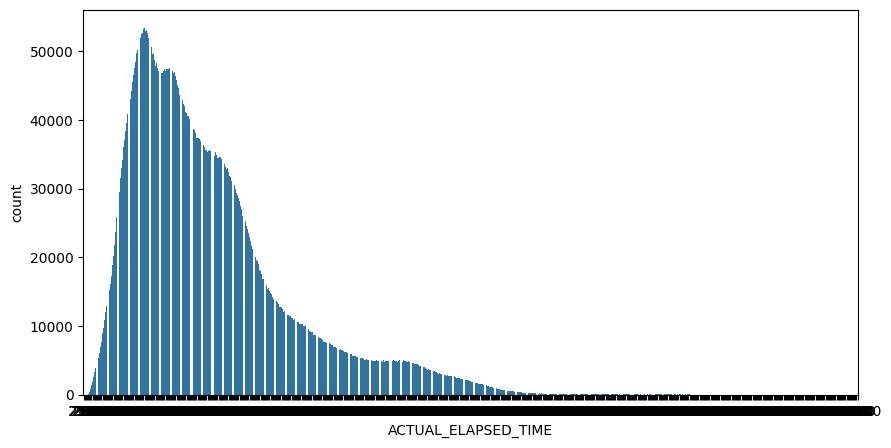

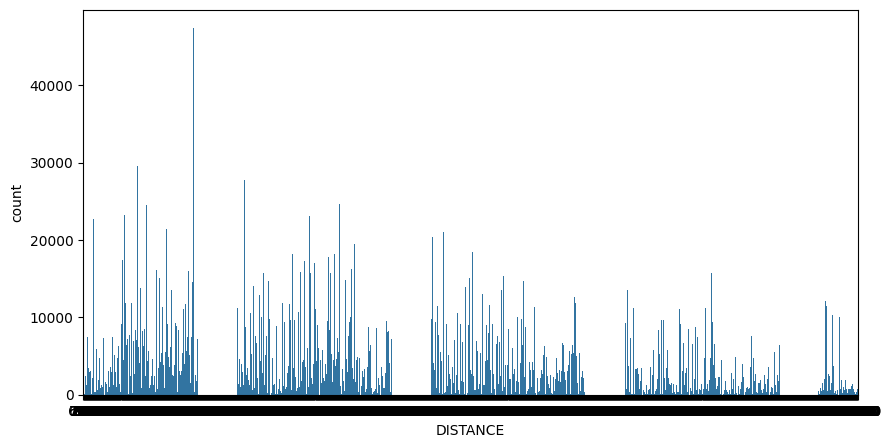

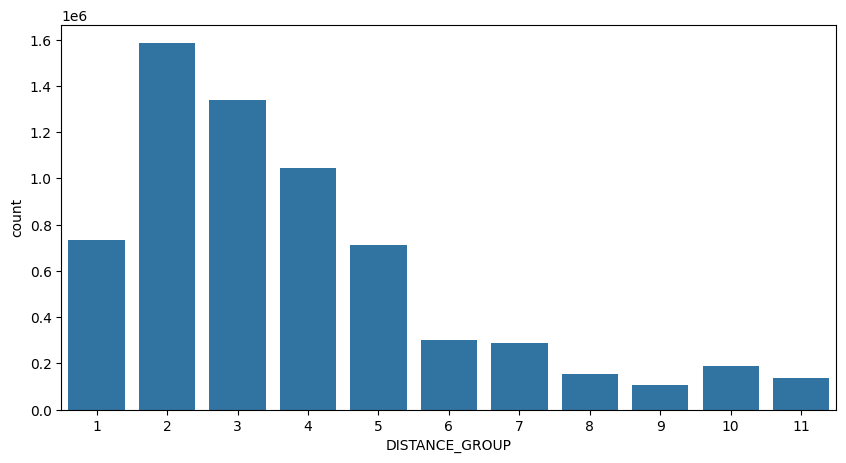

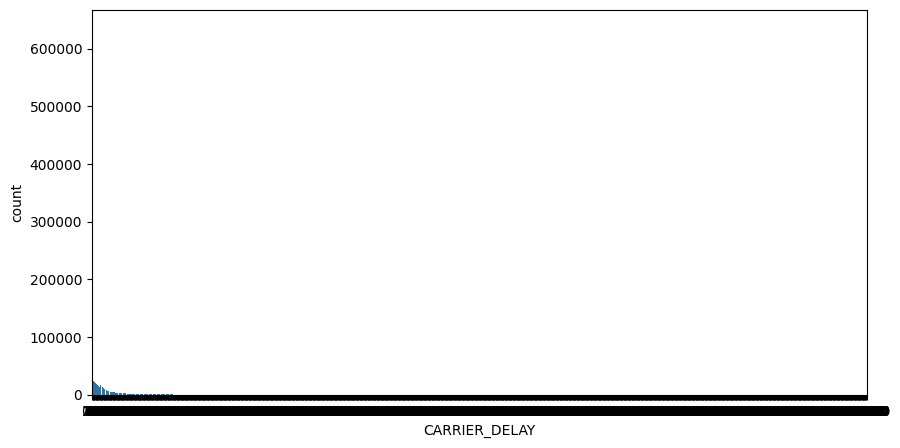

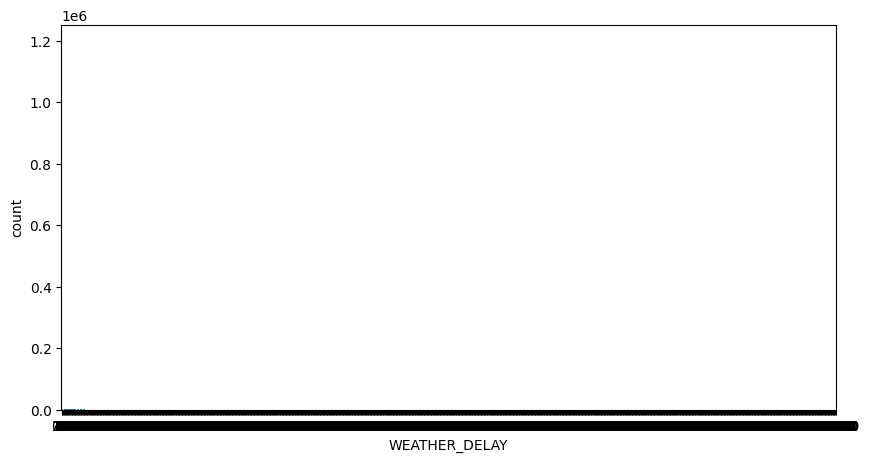

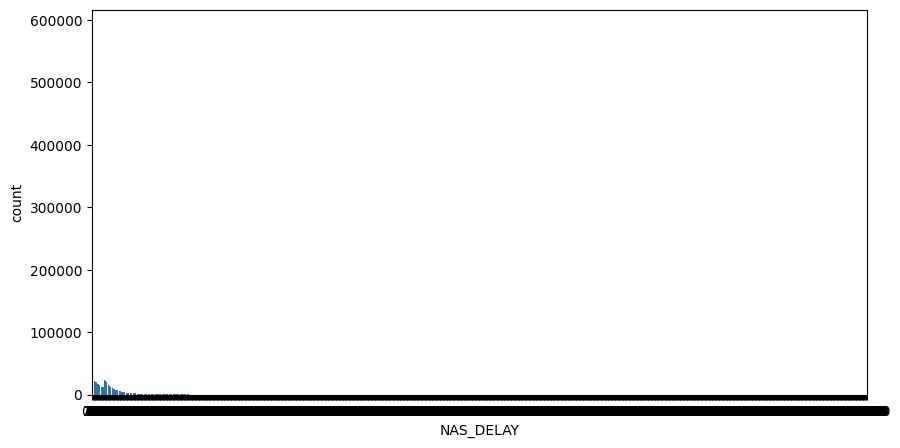

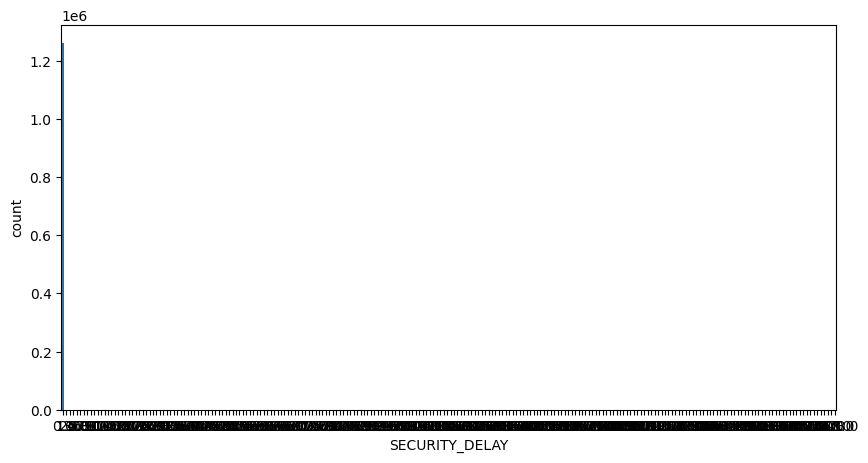

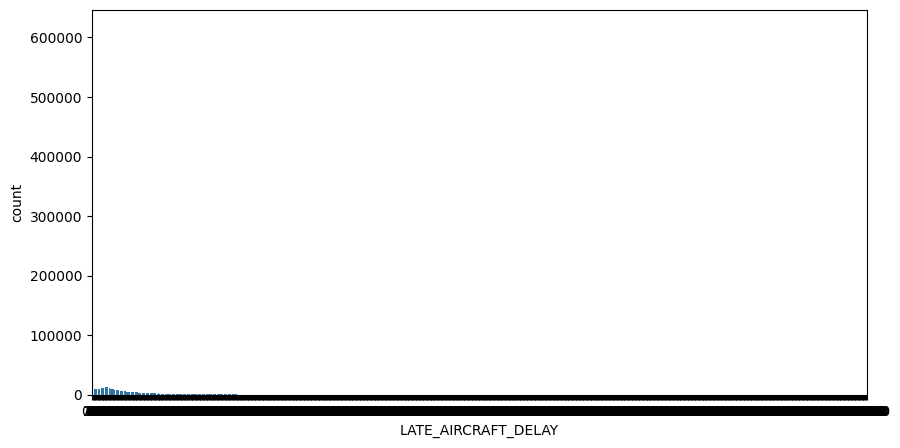

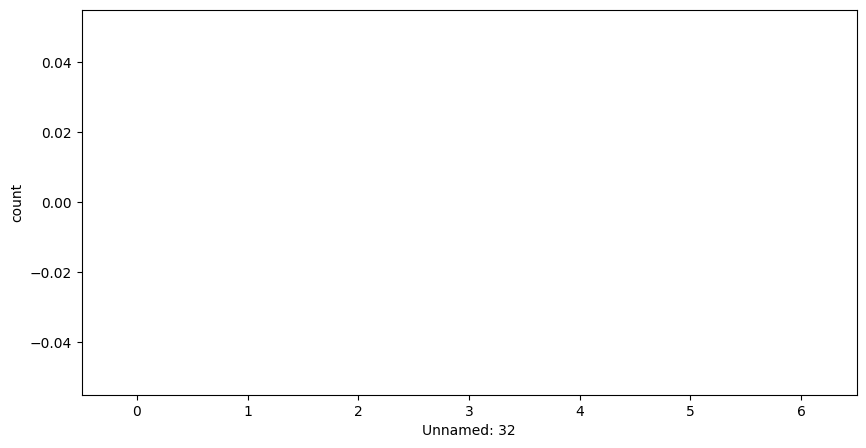

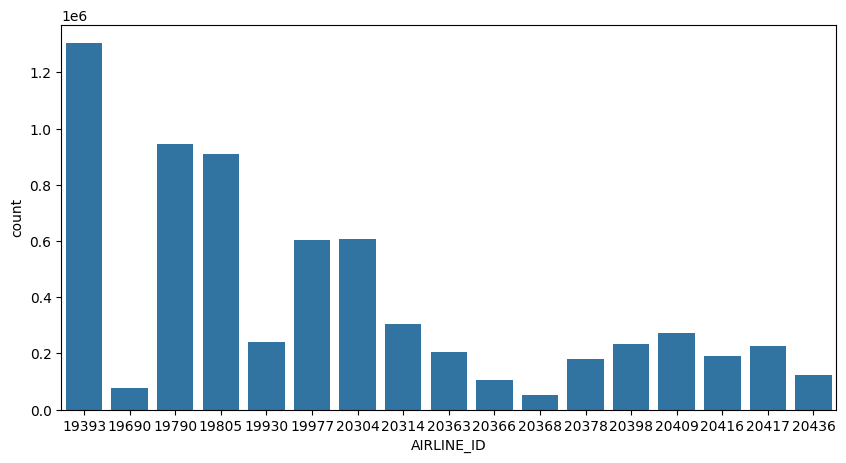

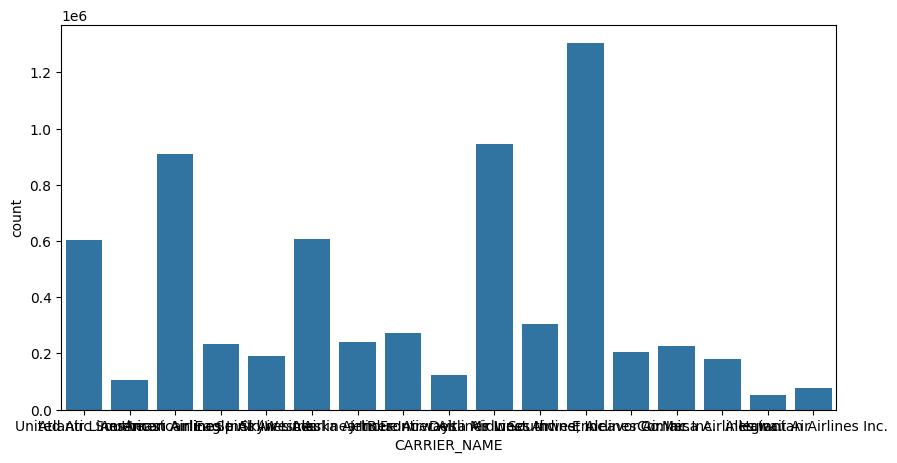

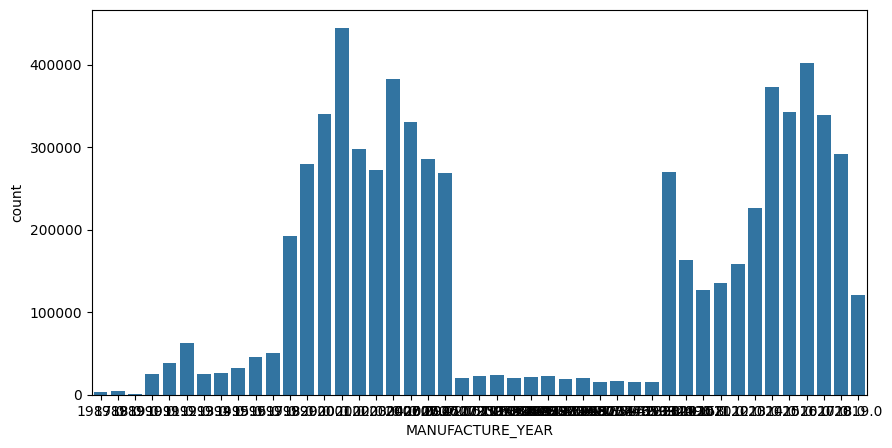

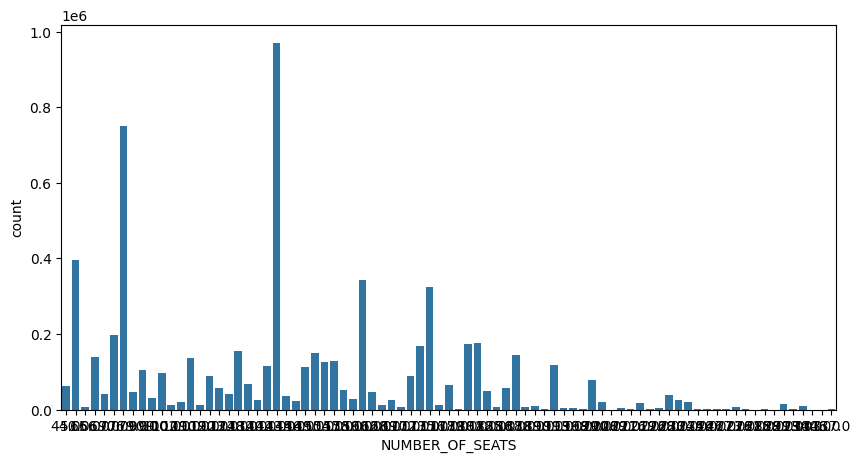

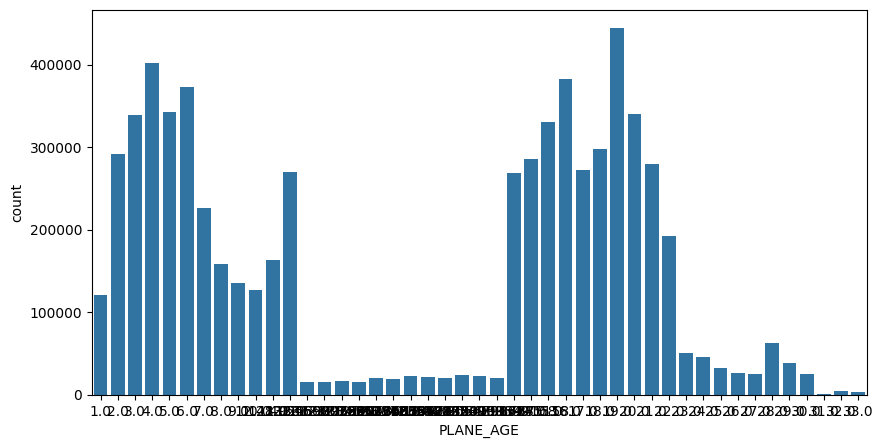

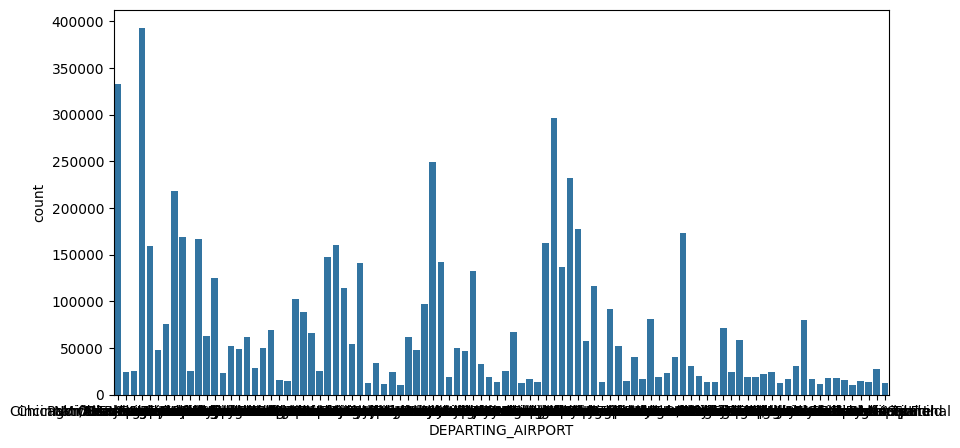

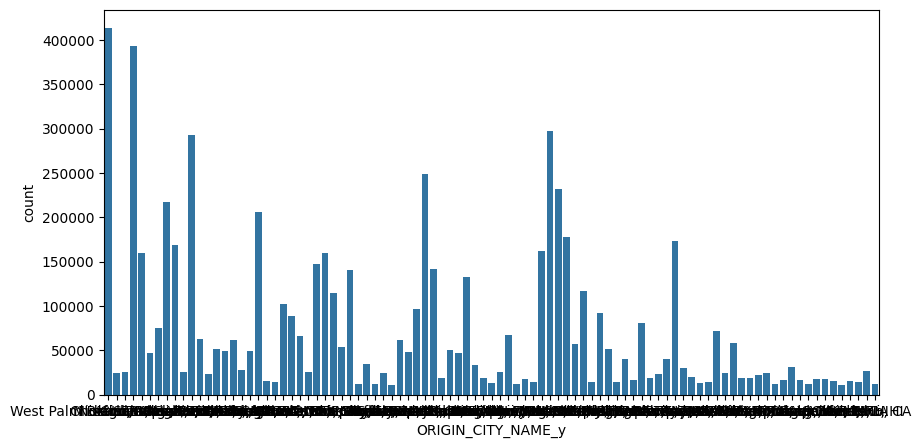

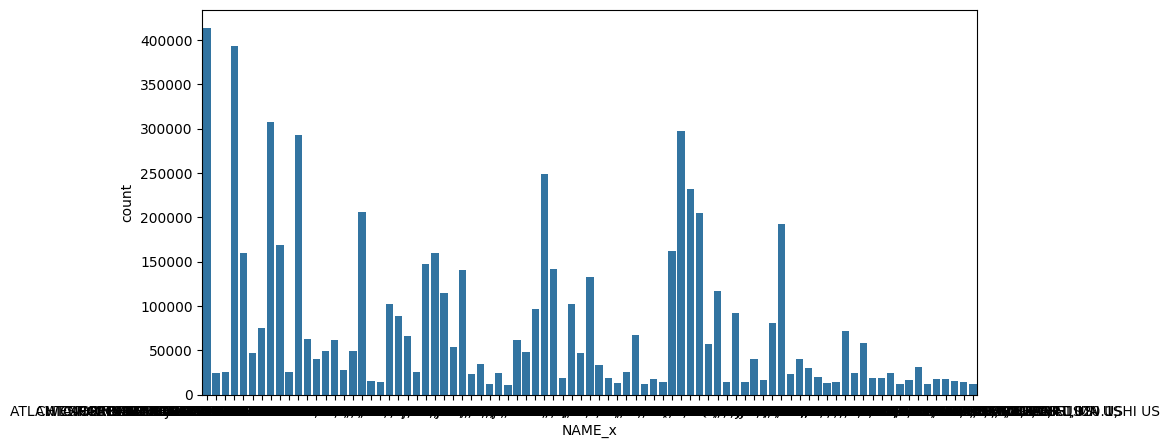

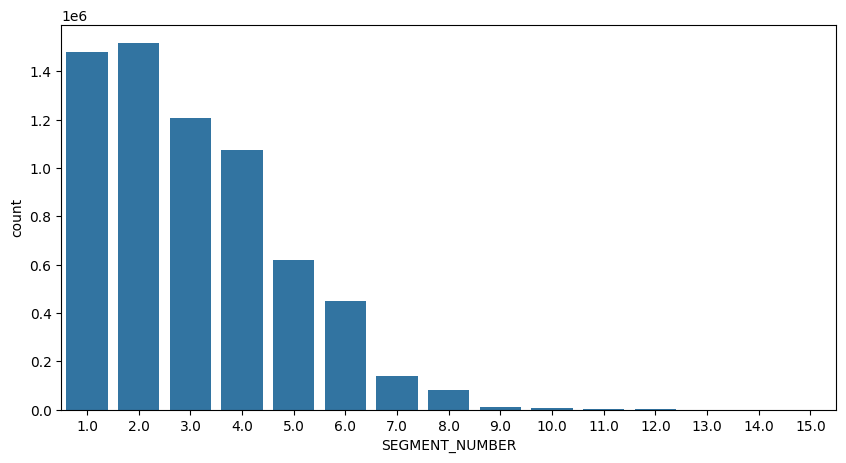

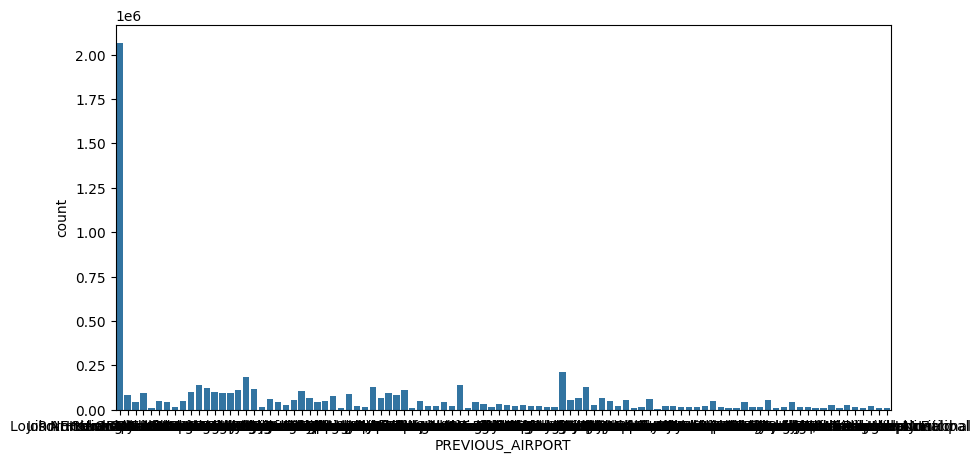

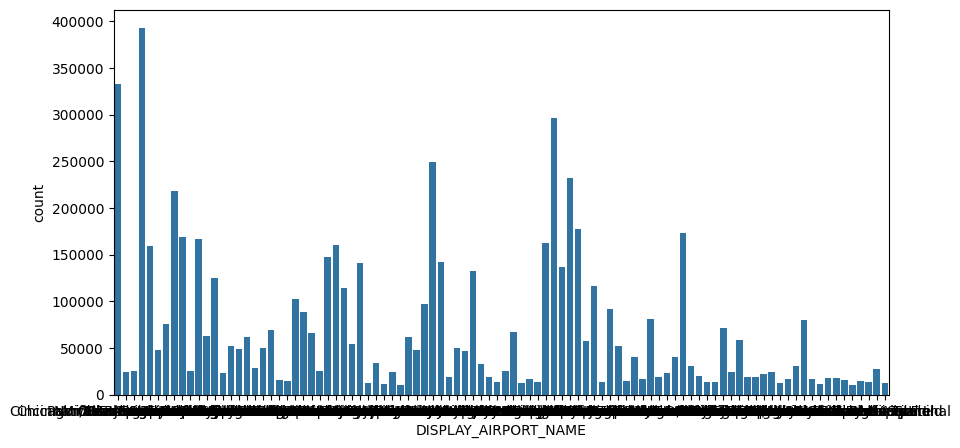

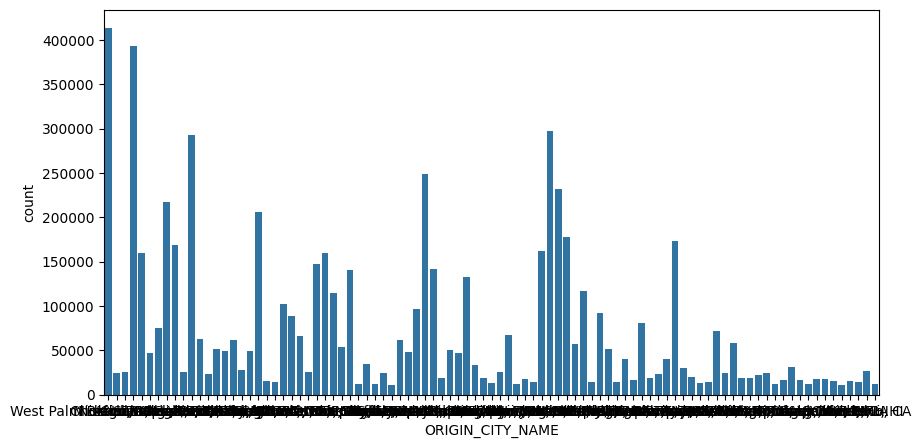

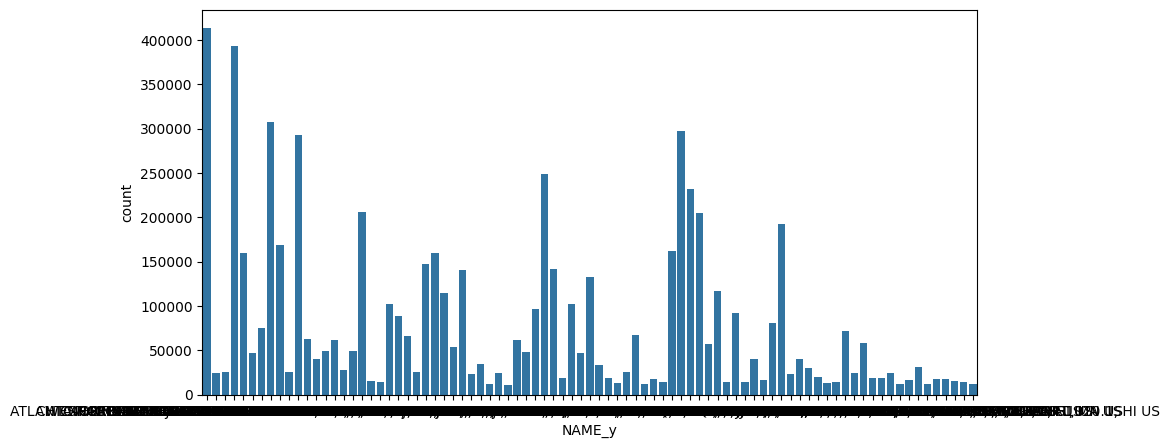

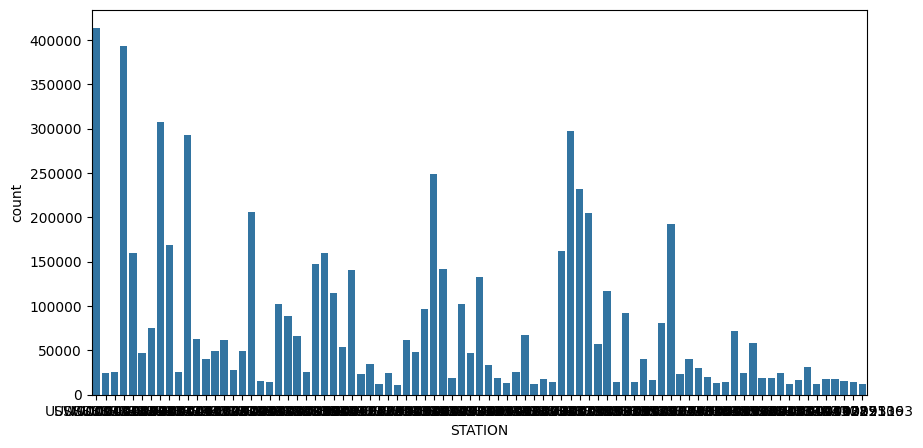

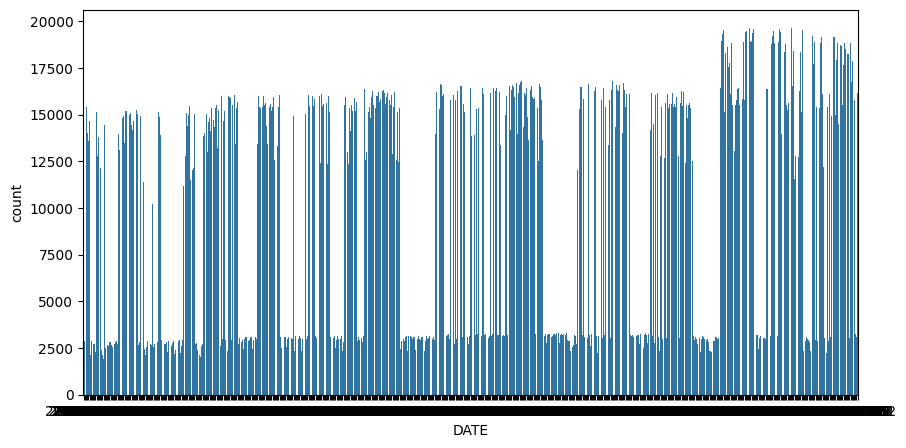

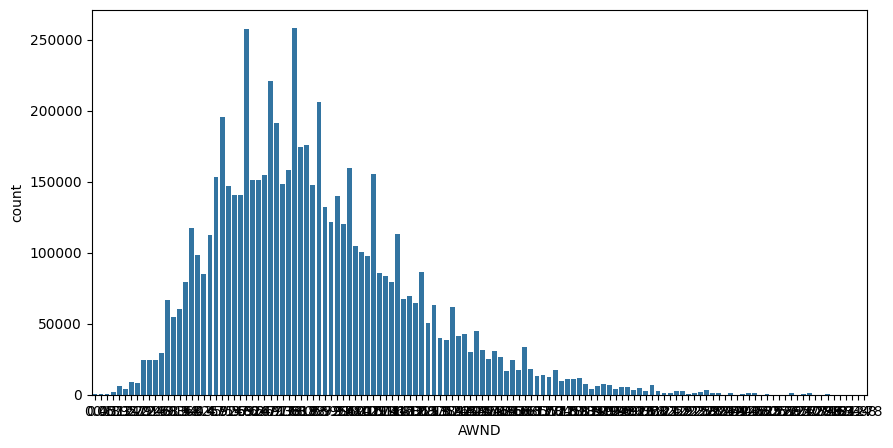

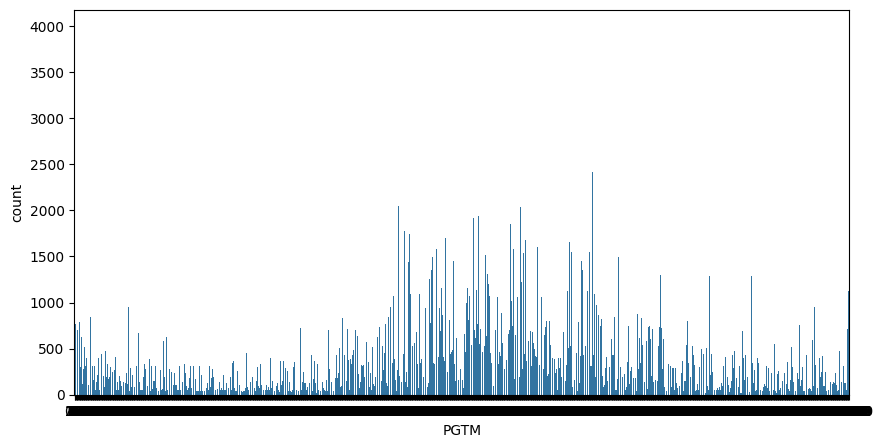

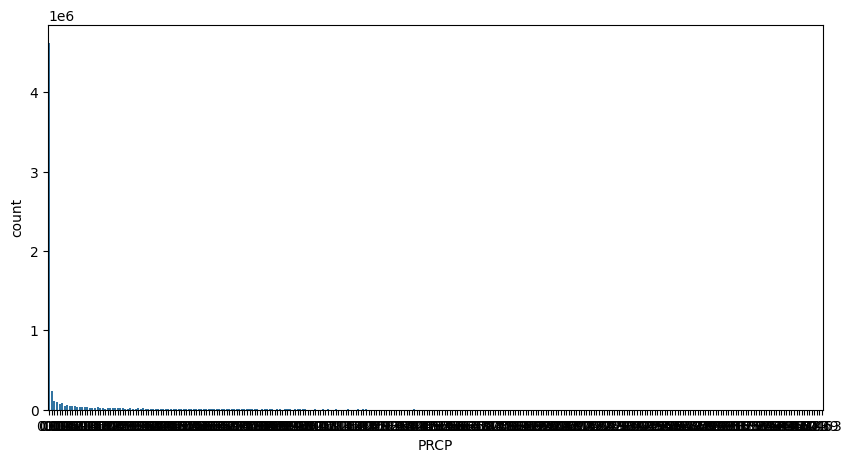

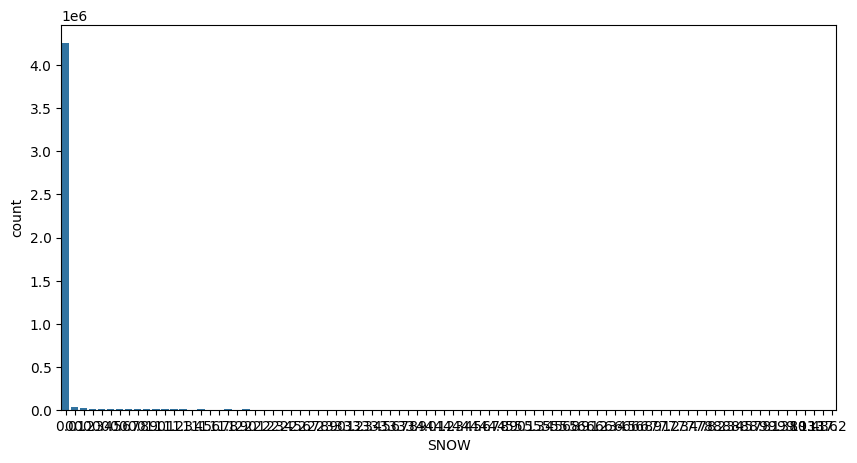

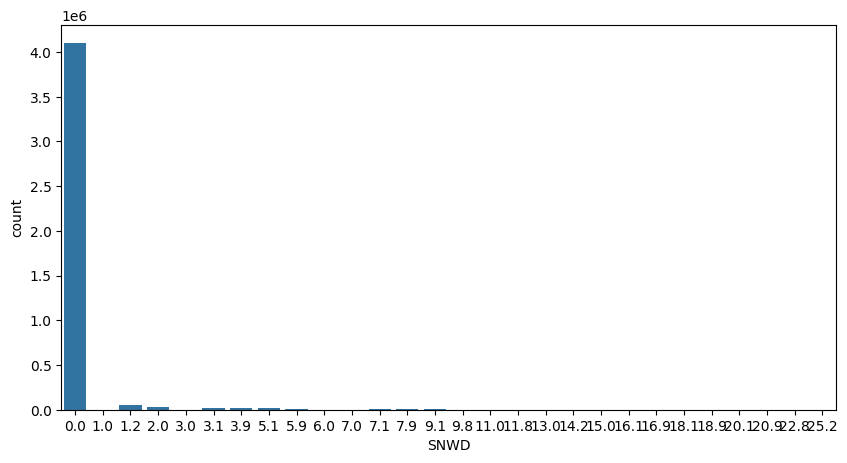

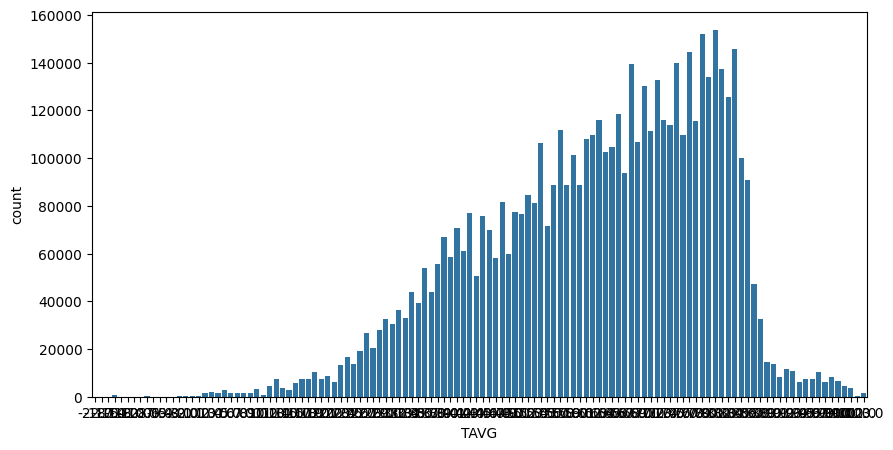

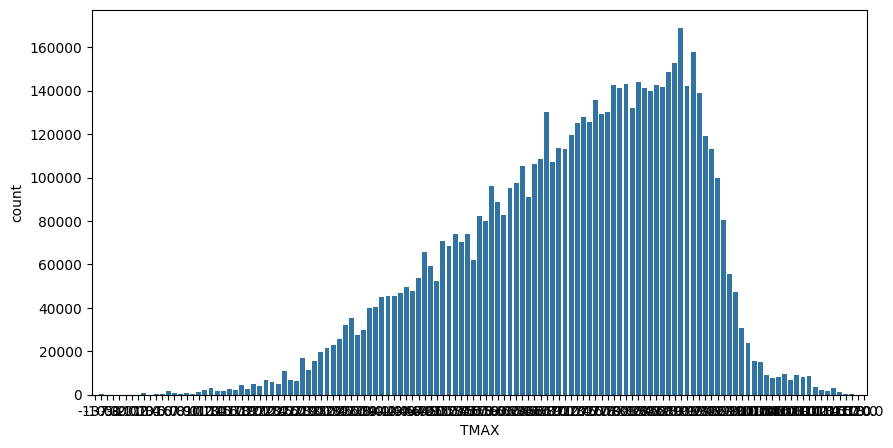

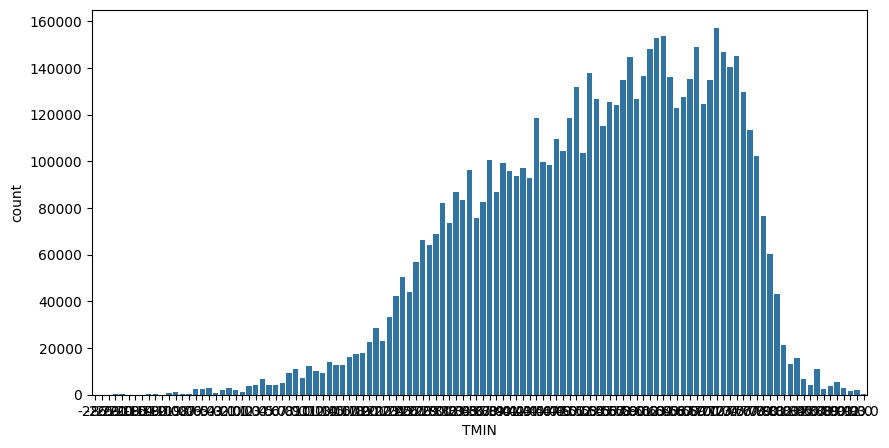

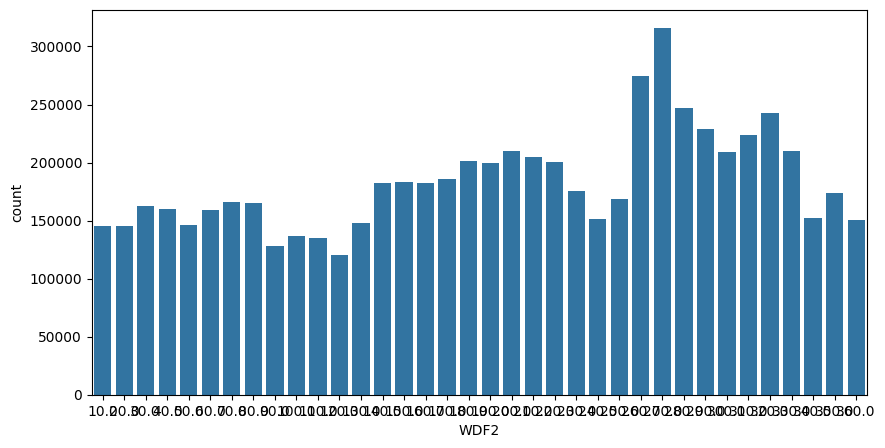

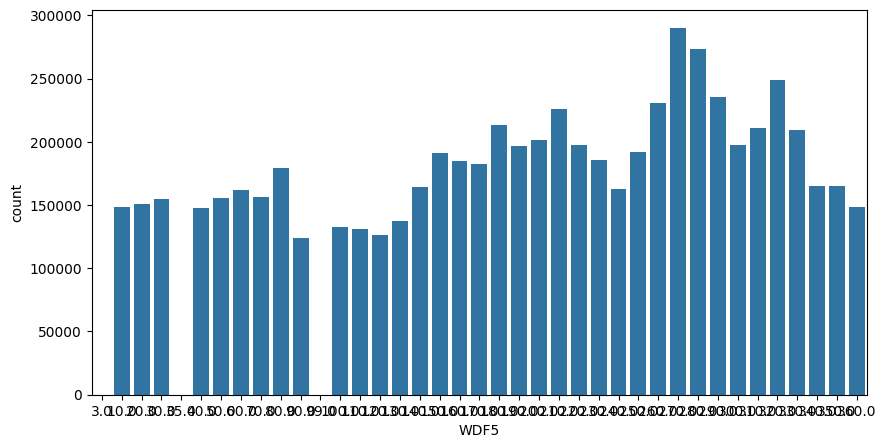

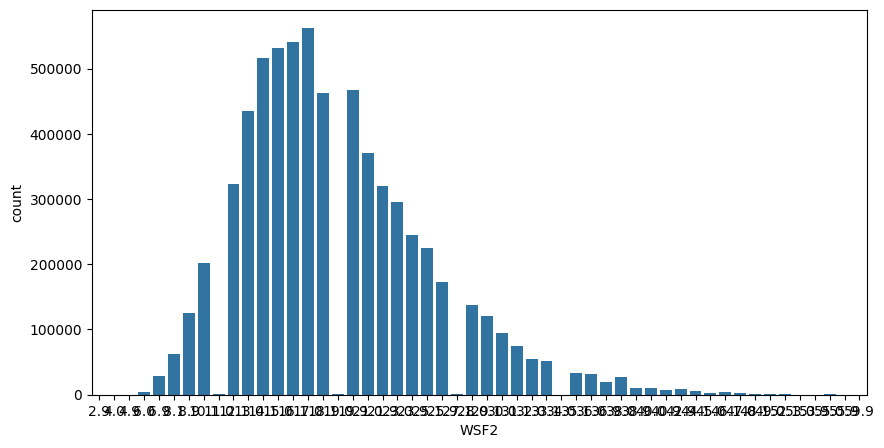

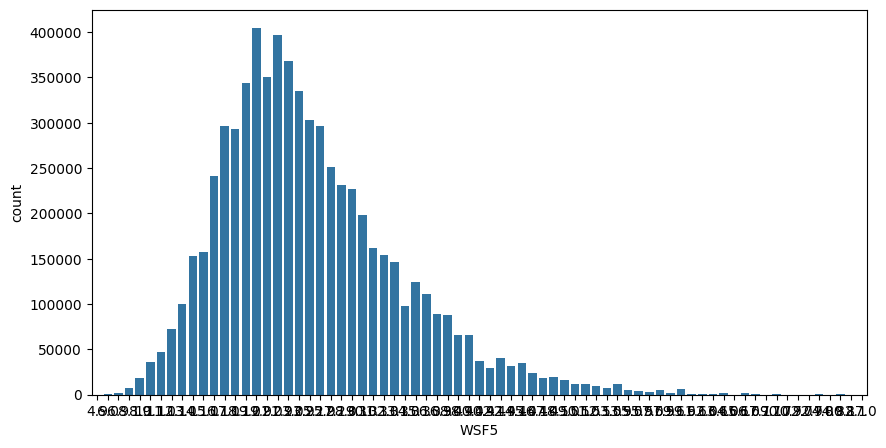

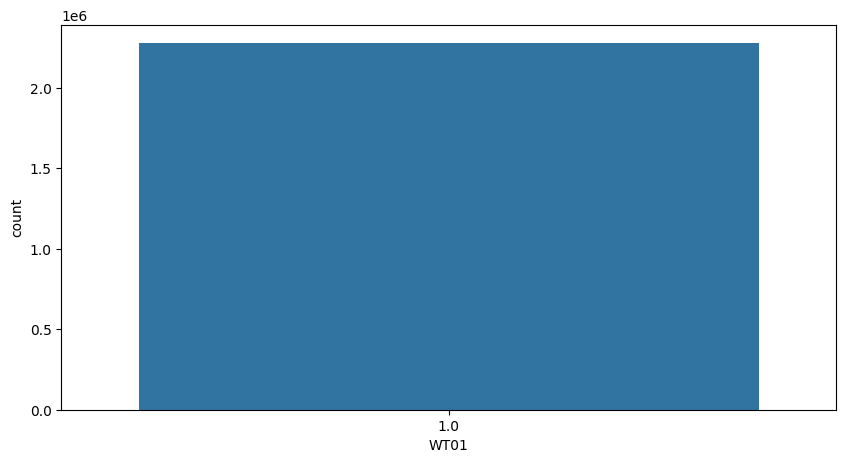

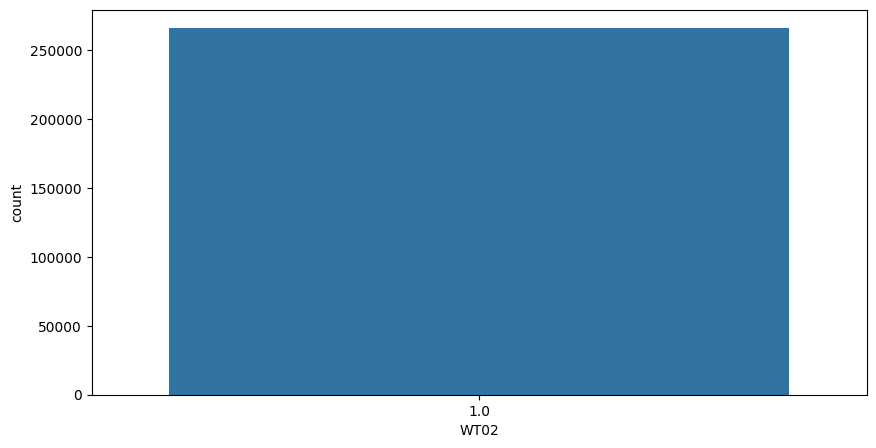

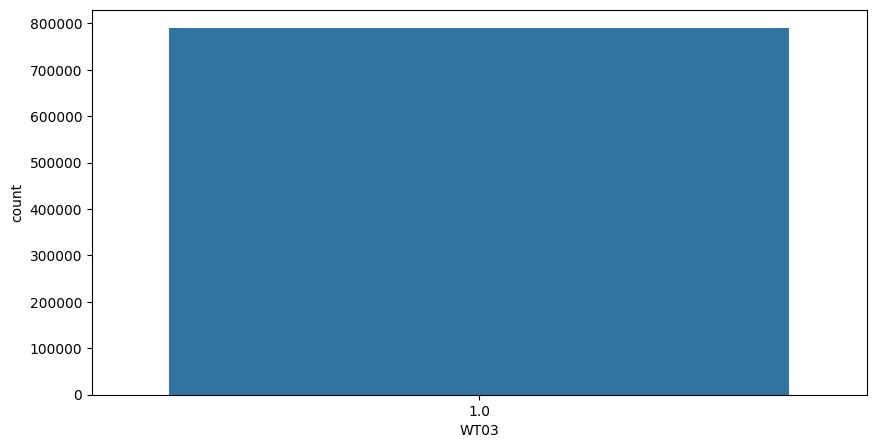

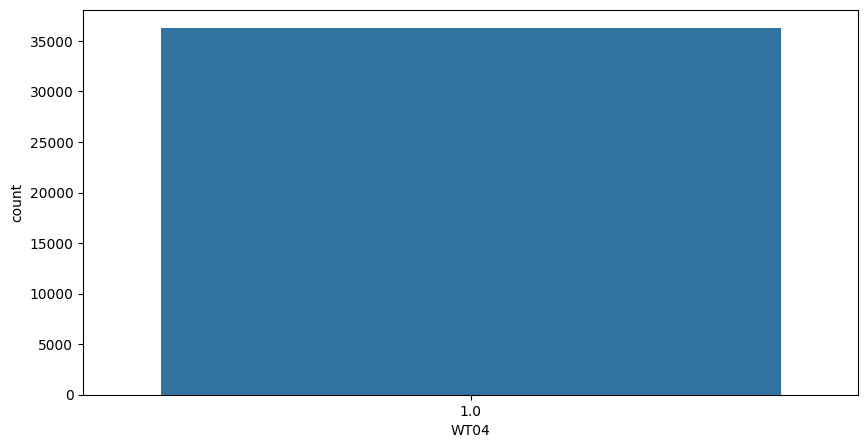

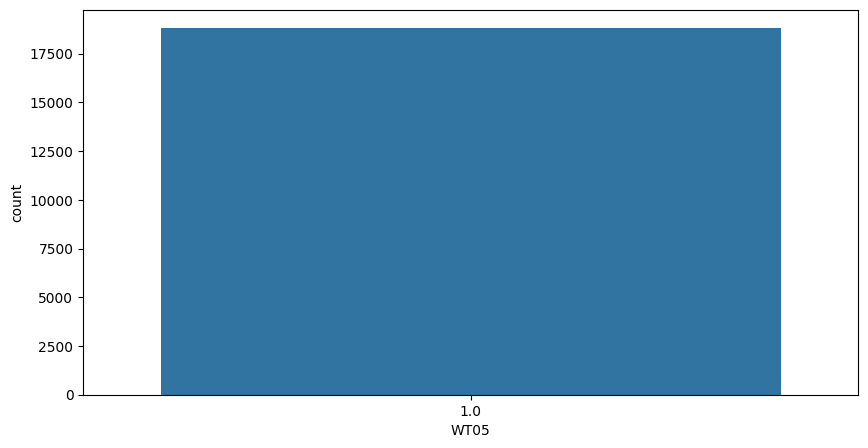

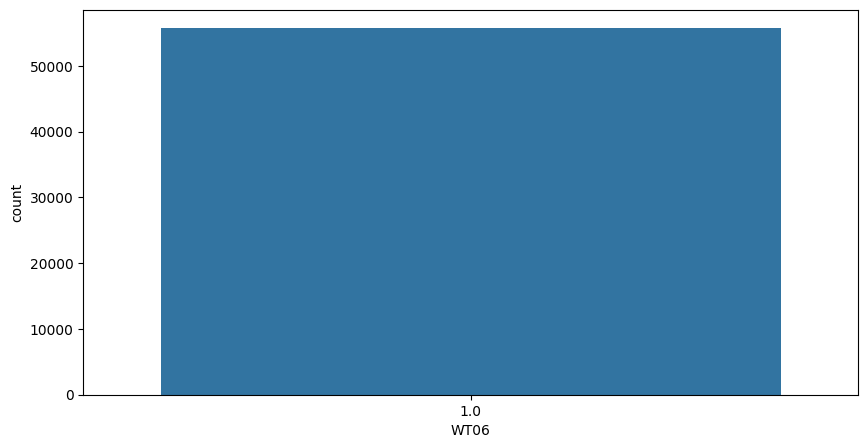

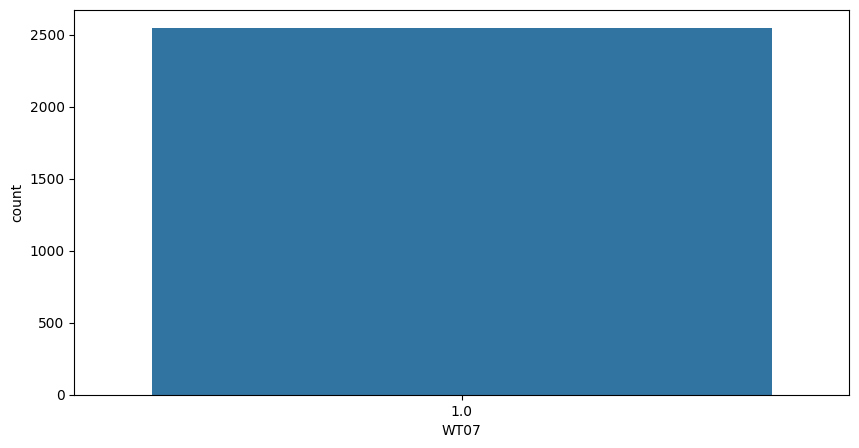

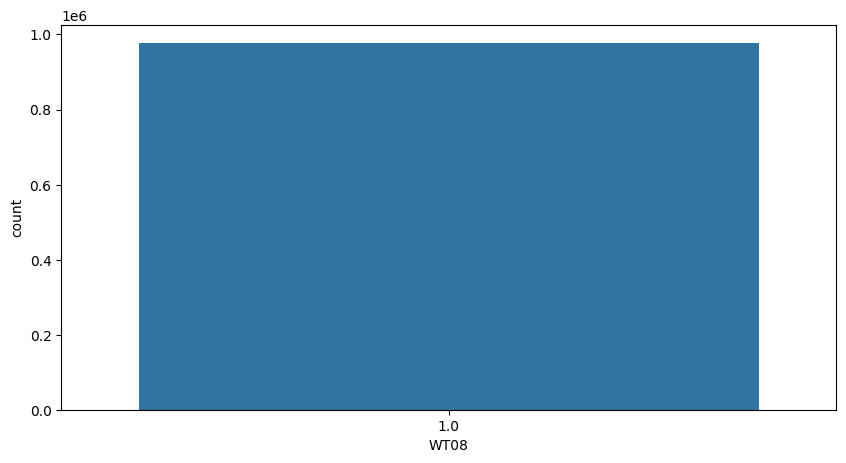

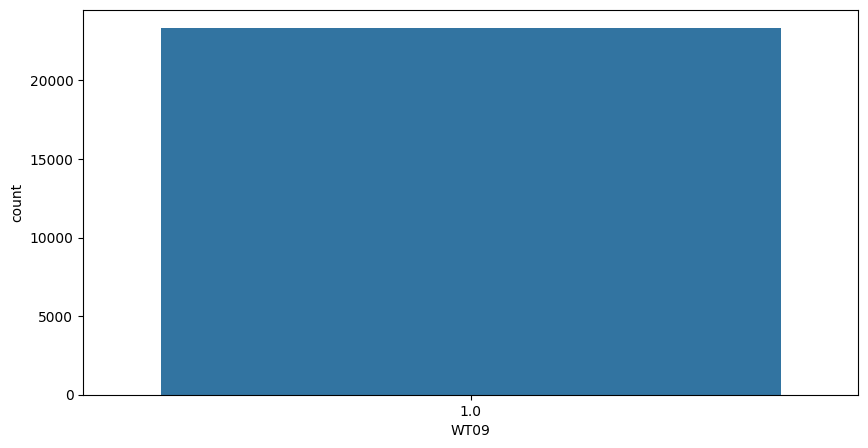

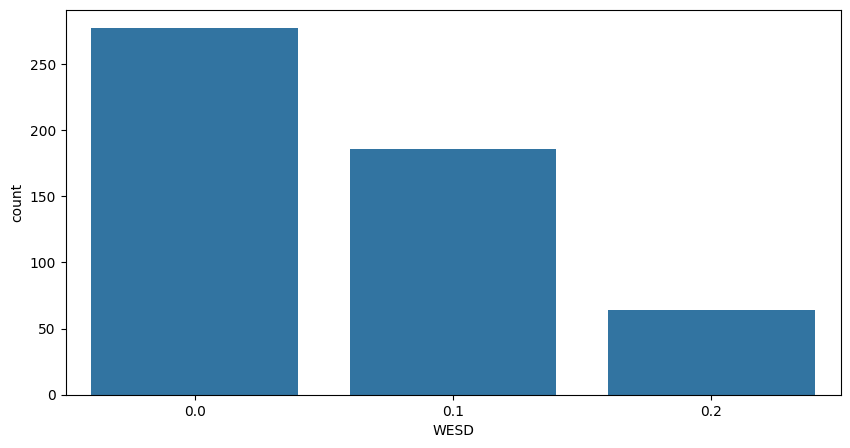

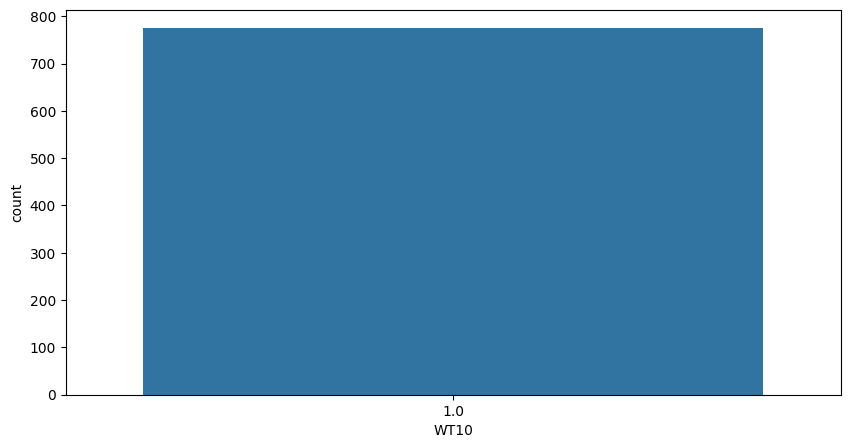

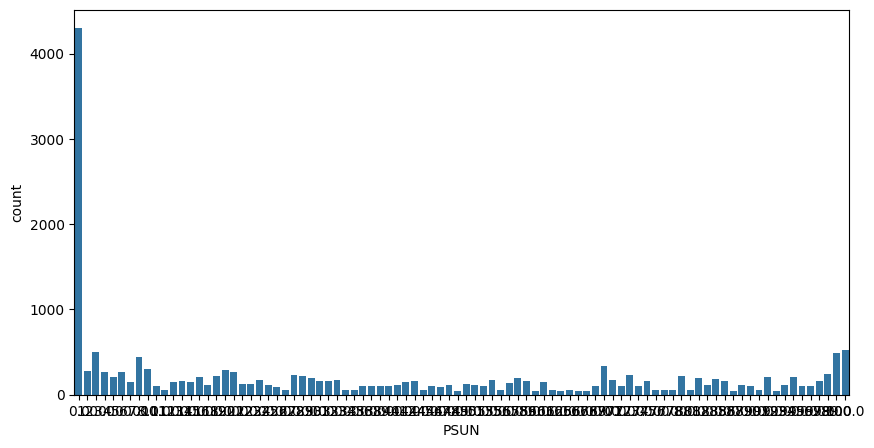

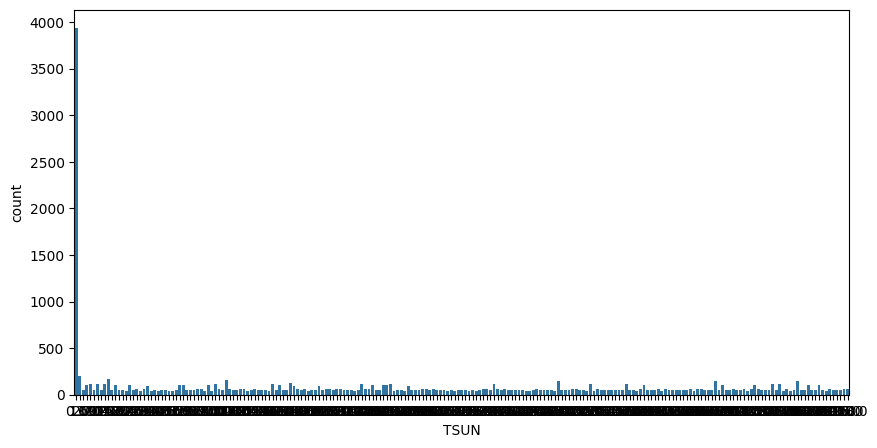

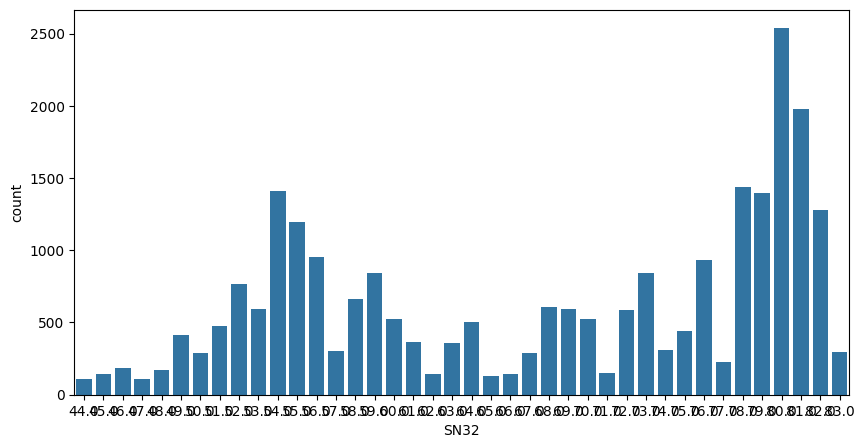

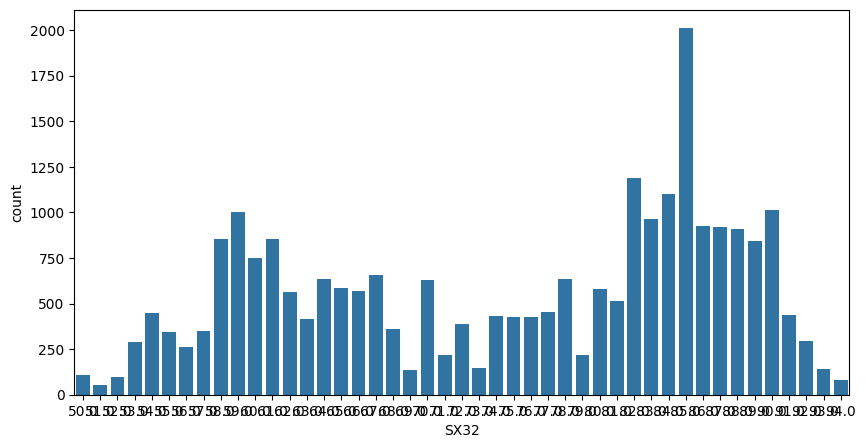

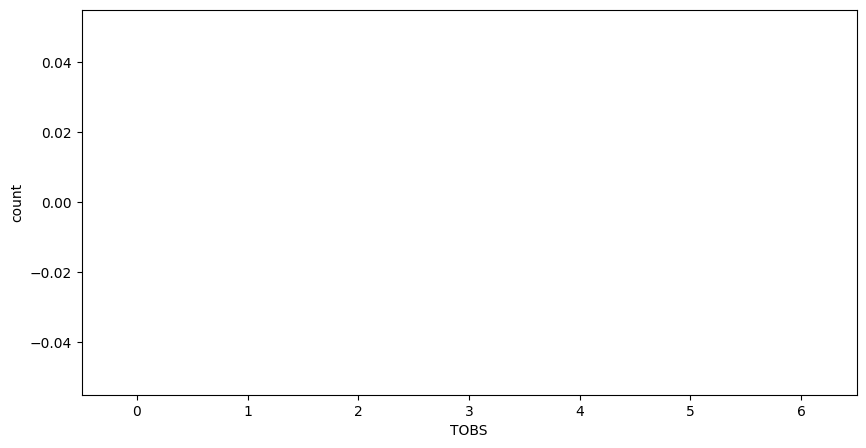

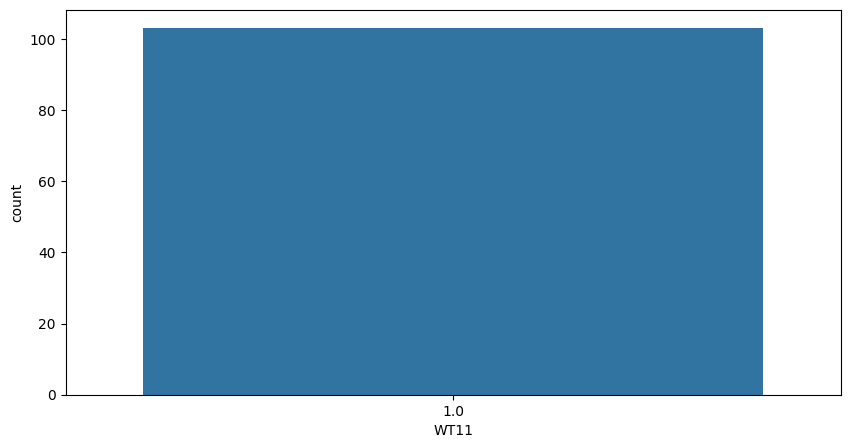

In [5]:
# #count plot for every column
# for col in df.columns:
#     plt.figure(figsize=(10,5))
#     sns.countplot(x=col, data=df)
#     plt.show()

### Better EDA

#### Numerical Columns

In [6]:
# select numerical columns
num_feats = df.select_dtypes(include=['int64', 'float64']).columns
# Find the sum of null values in each numerical column that are more than 1000
df[num_feats].isnull().sum()[df[num_feats].isnull().sum() > 100000].sort_values(ascending=False)/len(df)

TOBS                   1.000000
Unnamed: 32            1.000000
WT11                   0.999984
WESD                   0.999920
WT10                   0.999882
WT07                   0.999614
TSUN                   0.997339
PSUN                   0.997287
WT05                   0.997146
WT09                   0.996462
SX32                   0.996174
SN32                   0.996174
WT04                   0.994499
WT06                   0.991546
WT02                   0.959697
PGTM                   0.936734
WT03                   0.880185
WT08                   0.851807
WEATHER_DELAY          0.808094
LATE_AIRCRAFT_DELAY    0.808094
SECURITY_DELAY         0.808094
NAS_DELAY              0.808094
CARRIER_DELAY          0.808094
WT01                   0.654436
SNWD                   0.350263
SNOW                   0.328308
TAVG                   0.141304
NUMBER_OF_SEATS        0.035447
dtype: float64

In [7]:
# create copy of df
df_copy = df.copy()
df_copy.shape

(6593309, 77)

In [11]:
# Find the sum of null values in each numerical column that are more than 80%
null_num_feats = df_copy[num_feats].isnull().sum()[df_copy[num_feats].isnull().sum() > 100000].sort_values(ascending=False)/len(df) > 0.8
# Drop columns with more than 80% null values
df_copy.drop(null_num_feats[null_num_feats == True].index, axis=1, inplace=True)
df_copy.shape

(6593309, 54)

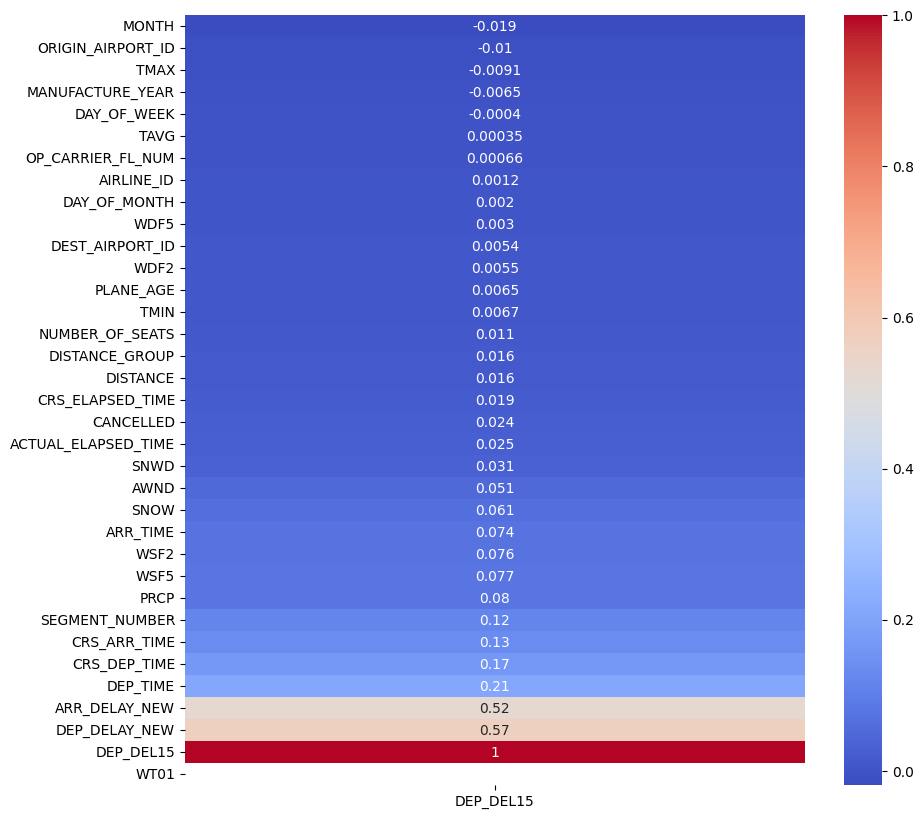

In [12]:
# select numerical columns again from copy
num_feats = df_copy.select_dtypes(include=['int64', 'float64']).columns
# heatmap of correlation between numerical columns and DEP_DEL15
plt.figure(figsize=(10,10))
sns.heatmap(df_copy[num_feats].corr()[['DEP_DEL15']].sort_values('DEP_DEL15'), annot=True, cmap='coolwarm')
plt.show()

## Preprocessing

In [ ]:
from sklearn.model_selection import train_test_split

In [5]:
df.describe()

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,DEP_DELAY_NEW,DEP_DEL15,...,WT08,WT09,WESD,WT10,PSUN,TSUN,SN32,SX32,TOBS,WT11
count,6.593309e+06,6.593309e+06,6.593309e+06,6.593309e+06,6.593309e+06,6.593309e+06,6.593309e+06,6.593309e+06,6.593298e+06,6.593298e+06,...,977079.0,23328.0,527.000000,775.0,17885.000000,17548.000000,25223.000000,25223.000000,0.0,103.0
mean,6.594736e+00,1.571927e+01,3.936387e+00,2.446673e+03,1.265535e+04,1.269515e+04,1.344005e+03,1.348911e+03,1.397318e+01,1.891004e-01,...,1.0,1.0,0.059583,1.0,35.783226,276.962047,67.872259,74.755144,NaN,1.0
std,3.405290e+00,8.760327e+00,1.995256e+00,1.761280e+03,1.514856e+03,1.523453e+03,4.935112e+02,5.082733e+02,4.638002e+01,3.915883e-01,...,0.0,0.0,0.069615,0.0,35.267737,278.736410,11.598958,11.968826,NaN,0.0
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.014000e+04,1.013500e+04,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,1.0,1.0,0.000000,1.0,0.000000,0.000000,44.000000,50.000000,NaN,1.0
25%,4.000000e+00,8.000000e+00,2.000000e+00,9.710000e+02,1.129200e+04,1.129200e+04,9.200000e+02,9.230000e+02,0.000000e+00,0.000000e+00,...,1.0,1.0,0.000000,1.0,1.000000,6.000000,56.000000,63.000000,NaN,1.0
50%,7.000000e+00,1.600000e+01,4.000000e+00,2.052000e+03,1.288900e+04,1.288900e+04,1.330000e+03,1.336000e+03,0.000000e+00,0.000000e+00,...,1.0,1.0,0.000000,1.0,25.000000,177.000000,70.000000,78.000000,NaN,1.0
75%,1.000000e+01,2.300000e+01,6.000000e+00,3.692000e+03,1.393000e+04,1.405700e+04,1.746000e+03,1.756000e+03,7.000000e+00,0.000000e+00,...,1.0,1.0,0.100000,1.0,69.000000,528.000000,79.000000,85.000000,NaN,1.0
max,1.200000e+01,3.100000e+01,7.000000e+00,7.933000e+03,1.591900e+04,1.686900e+04,2.359000e+03,2.400000e+03,2.710000e+03,1.000000e+00,...,1.0,1.0,0.200000,1.0,100.000000,908.000000,83.000000,94.000000,NaN,1.0


In [16]:
df.columns

Index(['MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER', 'TAIL_NUM',
       'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN',
       'ORIGIN_CITY_NAME_x', 'DEST_AIRPORT_ID', 'DEST', 'DEST_CITY_NAME',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY_NEW', 'DEP_DEL15',
       'DEP_TIME_BLK', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY_NEW',
       'ARR_TIME_BLK', 'CANCELLED', 'CANCELLATION_CODE', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'DISTANCE', 'DISTANCE_GROUP', 'CARRIER_DELAY',
       'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY',
       'Unnamed: 32', 'AIRLINE_ID', 'CARRIER_NAME', 'MANUFACTURE_YEAR',
       'NUMBER_OF_SEATS', 'PLANE_AGE', 'DEPARTING_AIRPORT',
       'ORIGIN_CITY_NAME_y', 'NAME_x', 'SEGMENT_NUMBER', 'PREVIOUS_AIRPORT',
       'DISPLAY_AIRPORT_NAME', 'ORIGIN_CITY_NAME', 'NAME_y', 'STATION', 'DATE',
       'AWND', 'PGTM', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'WDF2',
       'WDF5', 'WSF2', 'WSF5', 'WT01', 'WT02', 'WT03',

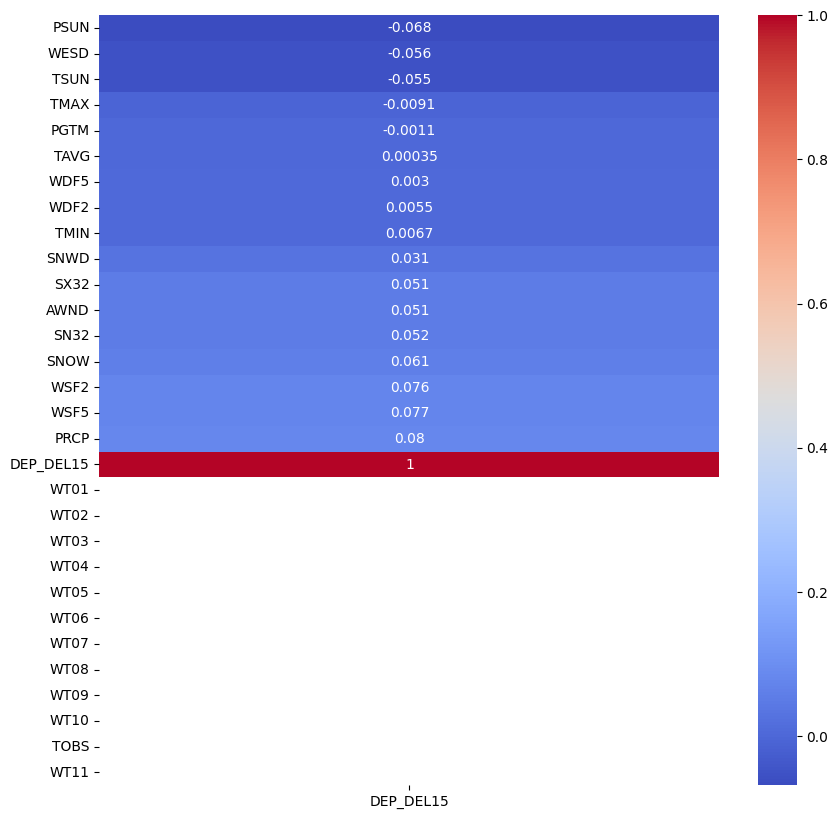

In [8]:
weather_columns = df[['AWND', 'PGTM', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'TMIN', 'WDF2',
       'WDF5', 'WSF2', 'WSF5', 'WT01', 'WT02', 'WT03', 'WT04', 'WT05', 'WT06',
       'WT07', 'WT08', 'WT09', 'WESD', 'WT10', 'PSUN', 'TSUN', 'SN32', 'SX32',
       'TOBS', 'WT11', 'DEP_DEL15']]

# select target column DEP_DEL15
target_column = df['DEP_DEL15']

# correlation heatmap of weather columns and DEP_DEL15
plt.figure(figsize=(10,10))
sns.heatmap(weather_columns.corr()[['DEP_DEL15']].sort_values('DEP_DEL15'), annot=True, cmap='coolwarm')
plt.show()

In [10]:
# null values in weather columns sort by ascending
weather_columns.isnull().sum().sort_values(ascending=False)

TOBS         6593309
WT11         6593206
WESD         6592782
WT10         6592534
WT07         6590763
TSUN         6575761
PSUN         6575424
WT05         6574492
WT09         6569981
SN32         6568086
SX32         6568086
WT04         6557040
WT06         6537567
WT02         6327579
PGTM         6176179
WT03         5803331
WT08         5616230
WT01         4314900
SNWD         2309389
SNOW         2164636
TAVG          931660
WSF5           14369
WDF5           14369
PRCP            1989
TMIN            1548
TMAX            1215
AWND             686
WSF2              23
WDF2              23
DEP_DEL15         11
dtype: int64

In [11]:
# remove from weather columns null values that are more than 80%
weather_columns.drop(['WT11', 'WT10', 'WT09', 'WT08', 'WT07', 'WT06', 'WT05', 'WT04', 'WT03', 'WT02', 'WT01', 'WESD', 'SNOW', 'SN32', 'SX32', 'SNWD', 'TSUN', 'PSUN', 'PGTM'], axis=1, inplace=True)

C:\Users\jcmuf\AppData\Local\Temp\ipykernel_25684\3192129814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_columns.drop(['WT11', 'WT10', 'WT09', 'WT08', 'WT07', 'WT06', 'WT05', 'WT04', 'WT03', 'WT02', 'WT01', 'WESD', 'SNOW', 'SN32', 'SX32', 'SNWD', 'TSUN', 'PSUN', 'PGTM'], axis=1, inplace=True)


In [13]:
weather_columns.columns

Index(['AWND', 'PRCP', 'TAVG', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5',
       'TOBS', 'DEP_DEL15'],
      dtype='object')

In [15]:
weather_data = df[['DEP_DEL15', 'WEATHER_DELAY', 'AWND', 'PRCP', 'TAVG', 'TMAX', 'TMIN', 'WDF2', 'WDF5', 'WSF2', 'WSF5',
       'TOBS']]

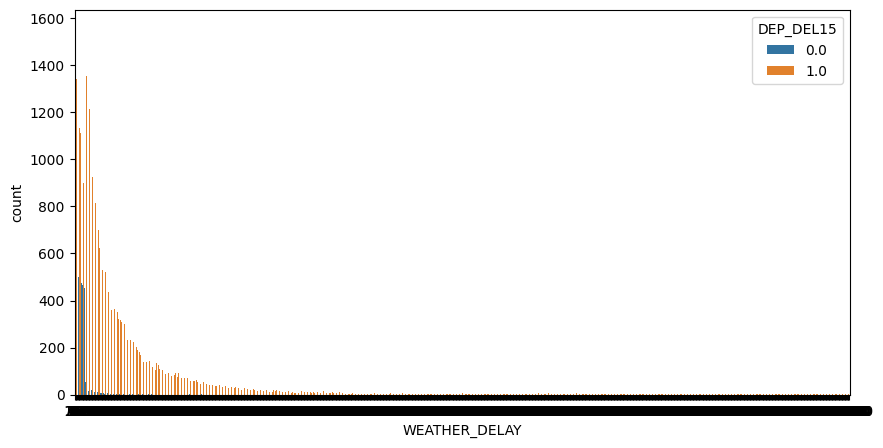

In [19]:
# count plot of WEATHER_DELAY above 0 with DEP_DEL15 as hue
plt.figure(figsize=(10,5)) 
sns.countplot(x='WEATHER_DELAY', data=weather_data[weather_data['WEATHER_DELAY'] > 0], hue='DEP_DEL15')
plt.show()


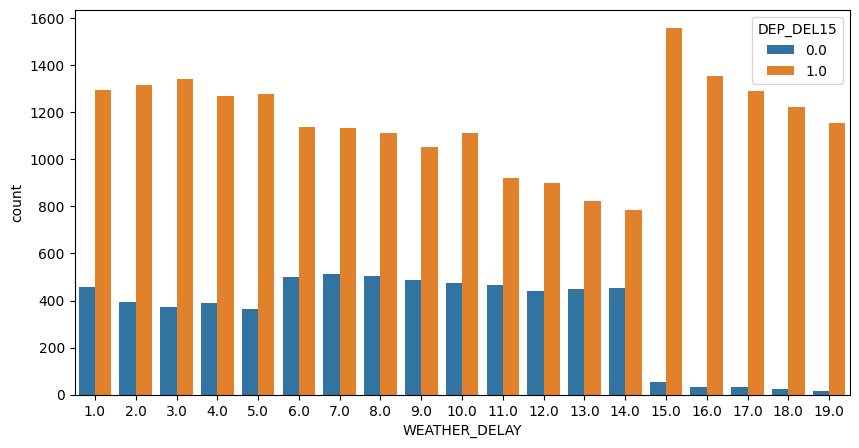

In [21]:
# count plot of WEATHER_DELAY above 0 and below 30 with DEP_DEL15 as hue
plt.figure(figsize=(10,5))
sns.countplot(x='WEATHER_DELAY', data=weather_data[(weather_data['WEATHER_DELAY'] > 0) & (weather_data['WEATHER_DELAY'] < 20)], hue='DEP_DEL15')
plt.show()

In [22]:
# get delay columns from df
delay_columns = df[['DEP_DEL15', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']]

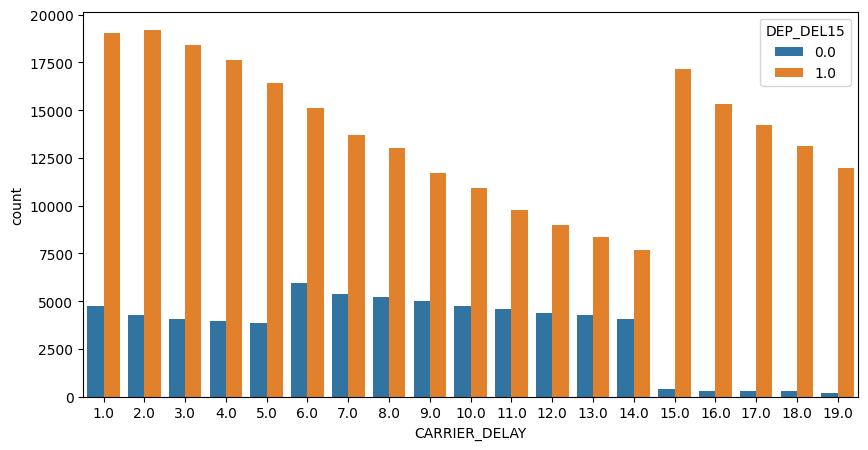

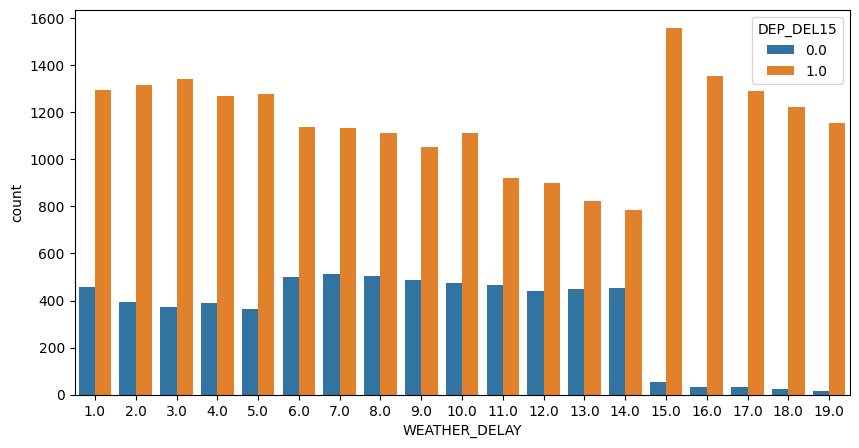

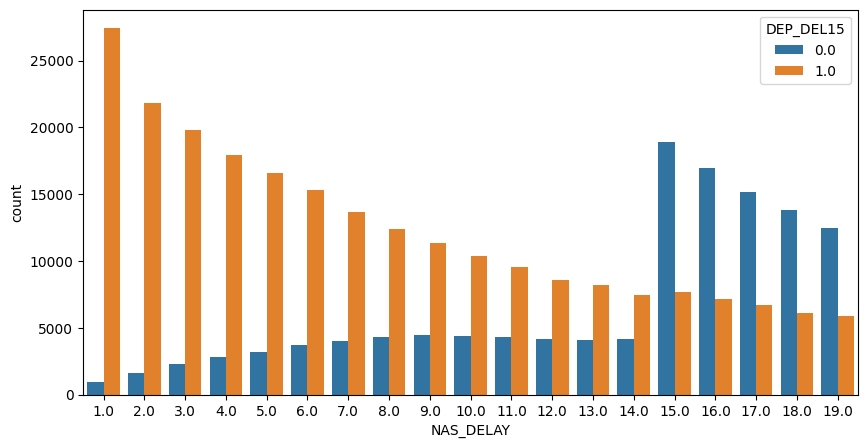

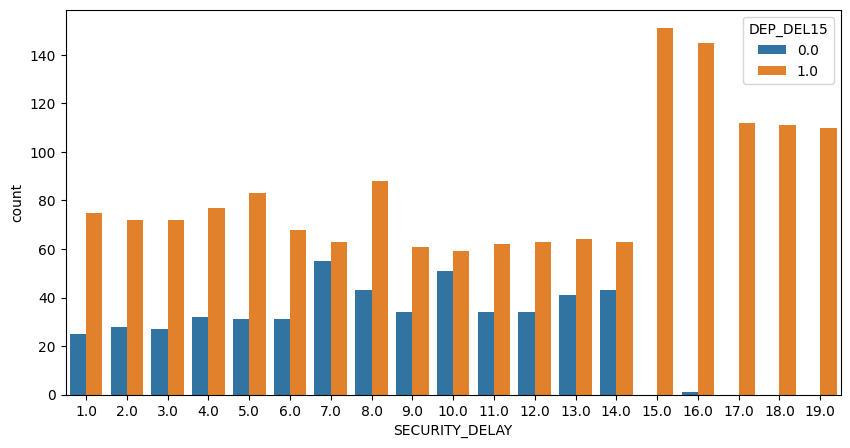

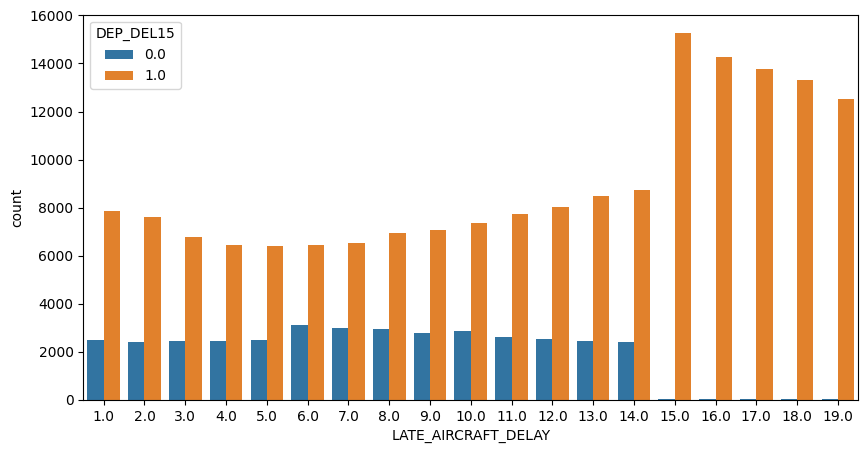

In [25]:
# loop through delay columns and plot count plot of each column with DEP_DEL15 as hue
for col in delay_columns.columns[1:]:
    plt.figure(figsize=(10,5))
    sns.countplot(x=col, data=delay_columns[(delay_columns[col] > 0) & (delay_columns[col] < 20)], hue='DEP_DEL15')
    plt.show()

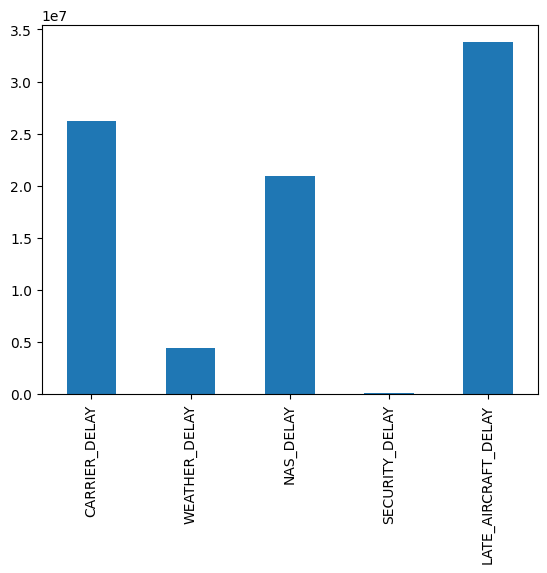

In [26]:
# stacked bar plot of delay columns with DEP_DEL15 as hue
delay_columns[delay_columns > 0].sum()[1:].plot(kind='bar', stacked=True)
plt.show()

In [5]:
# mean of WEATHER_DELAY column
df['WEATHER_DELAY'].mean()

3.517715659534985

In [6]:
# mean of WEATHER_DELAY where WEATHER_DELAY is more than 0
df[df['WEATHER_DELAY'] > 0]['WEATHER_DELAY'].mean()

61.91149223835754

In [27]:
knn = df[['AWND', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'WEATHER_DELAY', 
          'CARRIER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']].fillna(0)

knn["WEATHER_BOOL"] = (knn["WEATHER_DELAY"]>0).astype(int)

knn.drop(columns=["WEATHER_DELAY", 'CARRIER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY'], inplace=True)

knn.head()

,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,WEATHER_BOOL
0,12.75,0.53,5.0,9.1,18.0,34.0,0
1,12.75,0.53,5.0,9.1,18.0,34.0,0
2,12.75,0.53,5.0,9.1,18.0,34.0,1
3,12.75,0.53,5.0,9.1,18.0,34.0,1
4,12.75,0.53,5.0,9.1,18.0,34.0,0


In [6]:
delays_above_15 = df[df[['WEATHER_DELAY', 'CARRIER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']].sum(axis=1) == df['ARR_DELAY_NEW']]

In [7]:
delays_under_15 = df[df[['WEATHER_DELAY', 'CARRIER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']].sum(axis=1) != df['ARR_DELAY_NEW']]

In [10]:
display(delays_above_15)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME_x,DEST_AIRPORT_ID,...,WT08,WT09,WESD,WT10,PSUN,TSUN,SN32,SX32,TOBS,WT11
0,1,28,1,UA,N13718,830,13930,ORD,"Chicago, IL",14262,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,28,1,EV,N14902,4020,13930,ORD,"Chicago, IL",11193,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,28,1,UA,N56859,1942,13930,ORD,"Chicago, IL",11292,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,28,1,UA,N37253,2043,13930,ORD,"Chicago, IL",12266,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,28,1,UA,N57864,2005,13930,ORD,"Chicago, IL",11292,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593304,12,25,3,HA,N492HA,564,12982,LIH,"Lihue, HI",12173,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6593305,12,25,3,HA,N495HA,584,12982,LIH,"Lihue, HI",12173,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6593306,12,10,2,G4,230NV,1250,14761,SFB,"Sanford, FL",10431,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6593307,12,10,2,G4,249NV,2100,14761,SFB,"Sanford, FL",10135,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
display(delays_under_15)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME_x,DEST_AIRPORT_ID,...,WT08,WT09,WESD,WT10,PSUN,TSUN,SN32,SX32,TOBS,WT11
12,1,28,1,UA,N833UA,2166,13930,ORD,"Chicago, IL",14869,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,1,28,1,UA,N39418,1626,13930,ORD,"Chicago, IL",11618,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,1,28,1,UA,N68823,748,13930,ORD,"Chicago, IL",12266,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,1,28,1,UA,N469UA,667,13930,ORD,"Chicago, IL",14107,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,1,28,1,UA,N76505,342,13930,ORD,"Chicago, IL",10721,...,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6593271,12,25,3,AA,N130AN,2084,12982,LIH,"Lihue, HI",12892,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6593280,12,25,3,HA,N483HA,320,12982,LIH,"Lihue, HI",12758,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6593289,12,25,3,AA,N400AN,286,12982,LIH,"Lihue, HI",12892,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6593293,12,25,3,HA,N487HA,334,12982,LIH,"Lihue, HI",12173,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Training

In [13]:
knn_df_1 = df[df['CANCELLED'] == 0]

# PGTM is peak guest time, and there are 2.5 million null values and NA couldnt be represented with 0, because it doesnt make sense to have 0 peak guests.
knn_df_2 = knn_df_1[['AWND', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX', 'WEATHER_DELAY', 'CARRIER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'ARR_DELAY_NEW']]#.sort_values(by=['TAIL_NUM', 'DAY_OF_MONTH', 'DEP_TIME'])

# Find rows where all delay columns are 0
display(knn_df_2[(knn_df_2['WEATHER_DELAY'] == 0) & (knn_df_2['CARRIER_DELAY'] == 0) & (knn_df_2['NAS_DELAY'] == 0) & (knn_df_2['SECURITY_DELAY'] == 0) & (knn_df_2['LATE_AIRCRAFT_DELAY'] == 0)])

# There are no rows whose values are all 0, which means that there are no delays at all in that row
# Fill na values with 0
knn_df_2.fillna(0, inplace=True)

,AWND,PRCP,SNOW,SNWD,TAVG,TMAX,WEATHER_DELAY,CARRIER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,ARR_DELAY_NEW


C:\Users\jcmuf\AppData\Local\Temp\ipykernel_16004\310947661.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  knn_df_2.fillna(0, inplace=True)


In [4]:
# train knn_df_2 with a decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [14]:
# train knn_df_2 with a decision tree classifier with ARR_DELAY_NEW as target column
X = knn_df_2
y = knn_df_2['ARR_DELAY_NEW']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

predictions = dtree.predict(X_test)

print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

# train knn_df_2 with a decision tree classifier with DEP_DEL15 as target column

C:\Users\jcmuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\jcmuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jcmuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

0.9999205730879362
[[1292172       0       0 ...       0       0       0]
 [      0   33274       0 ...       0       0       0]
 [      0       0   30969 ...       0       0       0]
 ...
 [      0       0       0 ...       0       0       0]
 [      0       0       0 ...       0       0       0]
 [      0       0       0 ...       0       0       0]]


C:\Users\jcmuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jcmuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jcmuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1334: Undefi

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00   1292172
         1.0       1.00      1.00      1.00     33274
         2.0       1.00      1.00      1.00     30969
         3.0       1.00      1.00      1.00     28740
         4.0       1.00      1.00      1.00     26833
         5.0       1.00      1.00      1.00     24750
         6.0       1.00      1.00      1.00     22846
         7.0       1.00      1.00      1.00     21300
         8.0       1.00      1.00      1.00     19901
         9.0       1.00      1.00      1.00     18636
        10.0       1.00      1.00      1.00     17378
        11.0       1.00      1.00      1.00     16484
        12.0       1.00      1.00      1.00     15110
        13.0       1.00      1.00      1.00     14175
        14.0       1.00      1.00      1.00     13487
        15.0       1.00      1.00      1.00     12795
        16.0       1.00      1.00      1.00     12055
        17.0       1.00    

C:\Users\jcmuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\jcmuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
from sklearn import preprocessing

dt_df = df[['AWND', 'PRCP', 'SNOW', 'SNWD', 'TAVG', 'TMAX']]
dt_df.fillna(0, inplace=True)

label_encoder = preprocessing.LabelEncoder()
dt_target = label_encoder.fit_transform(df['ARR_DELAY_NEW'])

C:\Users\jcmuf\AppData\Local\Temp\ipykernel_16004\101379139.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_df.fillna(0, inplace=True)


In [25]:
dt = DecisionTreeClassifier()
dt.fit(dt_df, dt_target)

C:\Users\jcmuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:757: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\jcmuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:595: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\jcmuf\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:604: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)`

DecisionTreeClassifier()

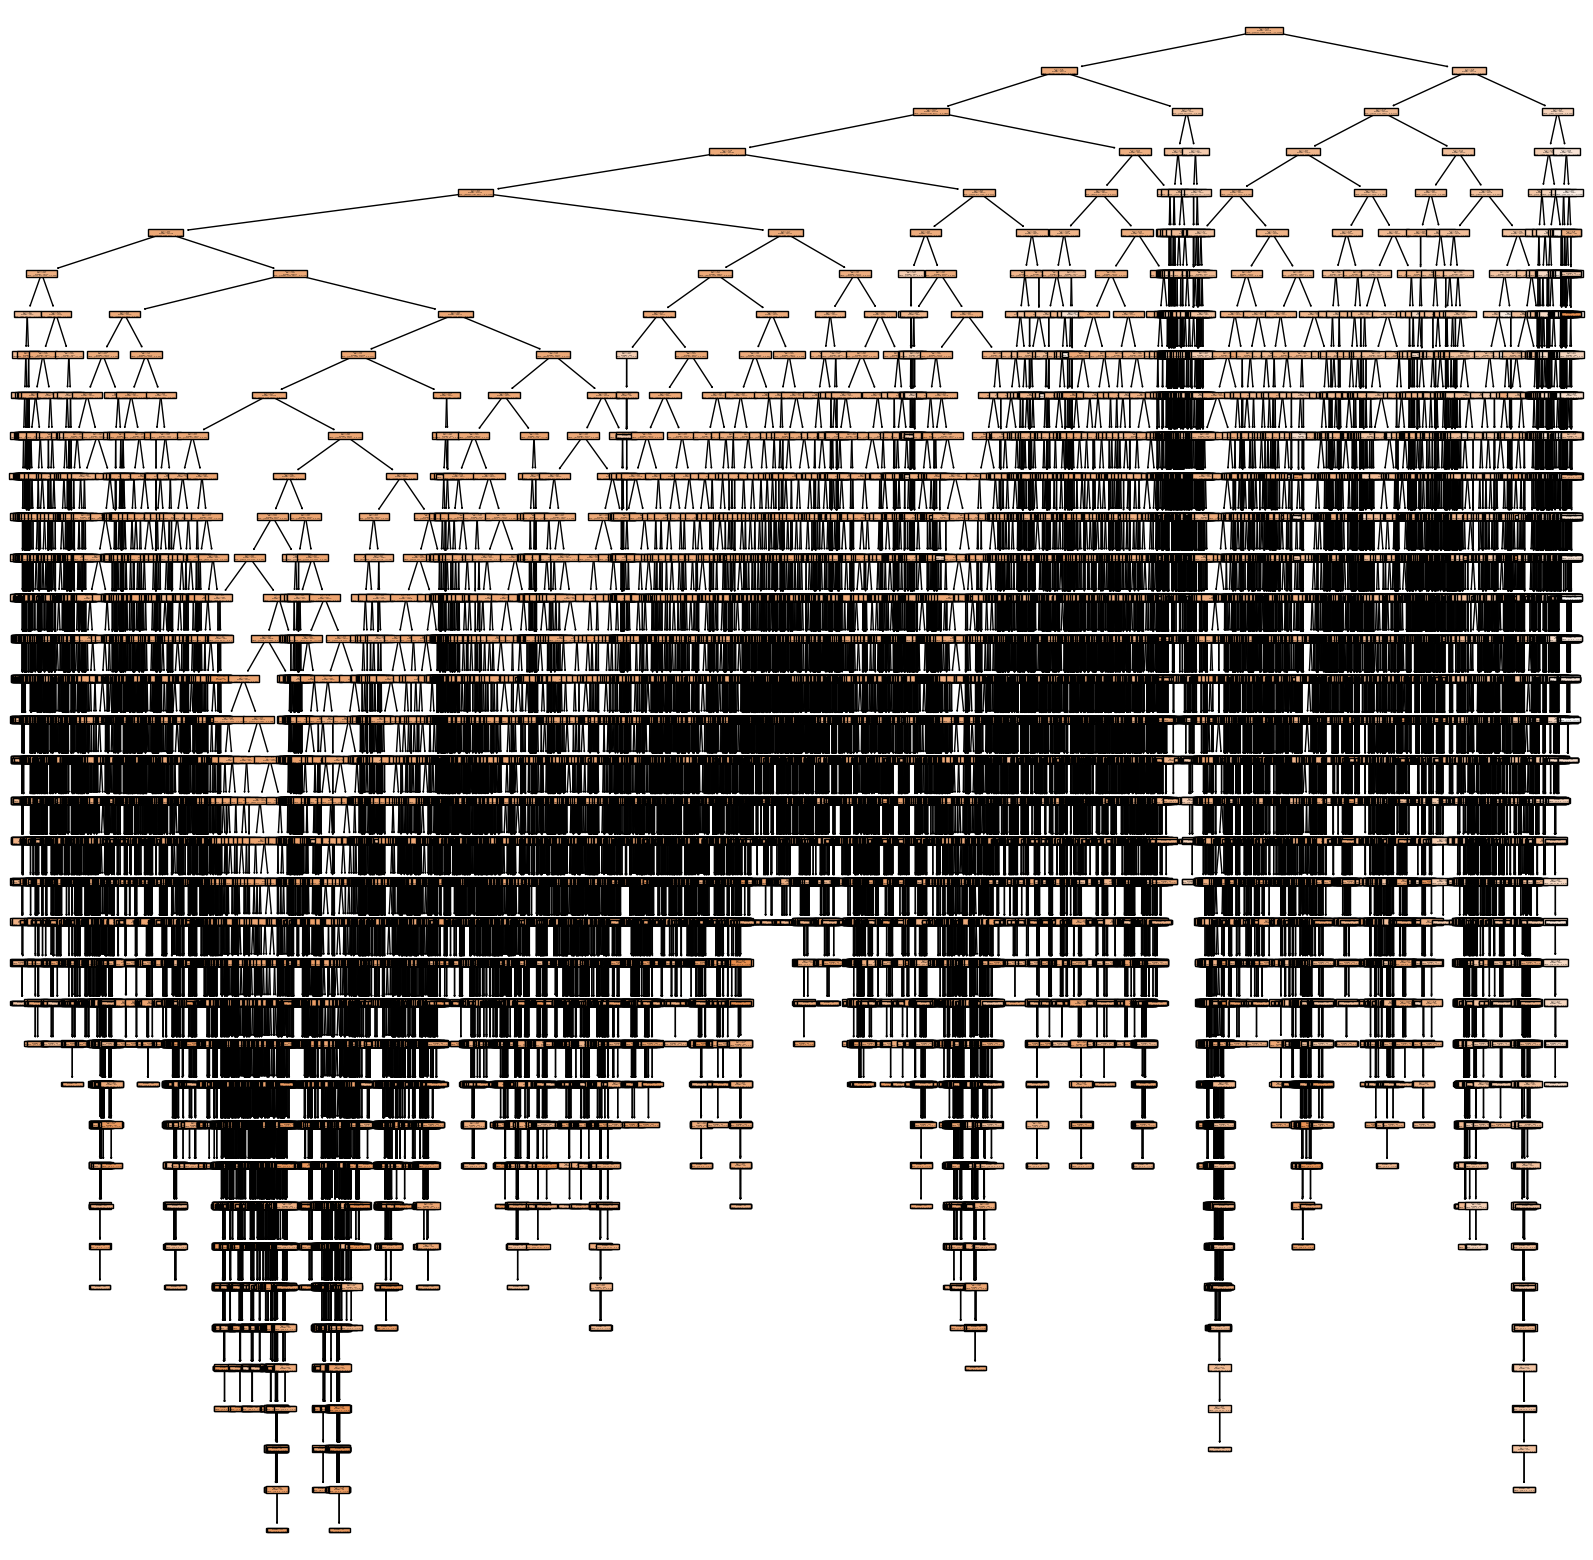

In [27]:
# plot dt
from sklearn import tree

plt.figure(figsize=(20,20))
tree.plot_tree(dt, filled=True)
plt.show()


## Evaluation